# Intro to Pandas for Data Analysis
Tarek A. Atwan 01/2025

# What is pandas?

Pandas was created by Wes McKinney to offer a flexible, high-performance tool for conducting quantitative analysis of financial data. Since 2008, Pandas has been used to manipulate, analyze, and visualize financial data. 

The name is derived from the term "**pan**el **da**ta", an econometrics term for data sets that include observations over multiple time periods for the same individuals, as well as a play on the phrase "Python data analysis" (_source: Wikipedia_)

#### pandas core data structures:
Two High-performance data structures:  
* **Series**: a one-dimensional (1D) labeled vectors/array
* **DataFrame**: a two-dimensional (2D) labeled data structure similar to spreadsheets

![dfs](images/dfs.jpg)

#### pandas key features:

* Efficient handling of large datasets and missing data
* Intuitive indexing and alignment for easy data manipulatio
* Built-in time series functionality, which is a must for financial and quants analysis
* Advanced tools for merging, joining, grouping, and reshaping datasets
* Support for multiple file formats, including CSV, Excel, JSON, and SQL
*  Built on top of **NumPy**, enabling fast computations via vectorized operations and memory efficiency

![io](images/io.jpg)


For additional resources:
* Official website: https://pandas.pydata.org/
* Pandas on GitHub: http://github.com/pydata/pandas
* <img src="images/wes.jpg" alt="Wes Book" style="width:10%; height:auto;"> https://wesmckinney.com/book/ and https://github.com/wesm/pydata-book/tree/3rd-edition
* <img src="images/tarek.jpg" alt="Time Series" style="width:10%; height:auto;"> https://github.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook-Second-Edition

## Creating a DataFrame
You can create a DataFrame from:
* a Python dictionary
* a Python list
* a Numpy array
* built in reader functions

In [39]:
#! pip install pandas

In [43]:
import pandas as pd
pd.__version__

'2.2.3'

In [97]:
# Python dictionary of lists
persons = { 'id': [12, 13, 20, 22],
            'Name': ['Tom', 'Nick', 'Smith', 'Ali'], 
            'Age': [20, 21, 25, 15],
            'hobbies': ['soccer', 'reading', 'swimming', 'soccer']}
df = pd.DataFrame(persons)

In [105]:
type(df)

pandas.core.frame.DataFrame

In [99]:
df

,id,Name,Age,hobbies
0,12,Tom,20,soccer
1,13,Nick,21,reading
2,20,Smith,25,swimming
3,22,Ali,15,soccer


In [101]:
print(df)

   id   Name  Age   hobbies
0  12    Tom   20    soccer
1  13   Nick   21   reading
2  20  Smith   25  swimming
3  22    Ali   15    soccer


In [103]:
display(df)

,id,Name,Age,hobbies
0,12,Tom,20,soccer
1,13,Nick,21,reading
2,20,Smith,25,swimming
3,22,Ali,15,soccer


In [107]:
df.columns

Index(['id', 'Name', 'Age', 'hobbies'], dtype='object')

In [109]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       4 non-null      int64 
 1   Name     4 non-null      object
 2   Age      4 non-null      int64 
 3   hobbies  4 non-null      object
dtypes: int64(2), object(2)
memory usage: 260.0+ bytes


In [117]:
# Pyton list of dictionaries

people = [
    {
     'id': 123,
     'name': 'Jack Smith',
     'age': 29,
     'hobby': 'soccer'
    },
    {
     'id': 456,
     'name': 'Alia Smith',
     'age': 15,
     'hobby': 'video games'
    },
    {
     'id': 789,
     'name': 'Mark Smith',
     'age': 32,
     'hobby': 'reading'
    }
]

pd.DataFrame.from_records(people)

,id,name,age,hobby
0,123,Jack Smith,29,soccer
1,456,Alia Smith,15,video games
2,789,Mark Smith,32,reading


In [137]:
# list of lists
persons = [
    [123, 'Tom', 20, 'soccer'],
    [456, 'Jack', 18, 'reading'],
    [788, 'Alia', 25, 'nerd'],
    [899, 'Sara', 16, 'ducks'],
]
pd.DataFrame(persons, columns=['id', 'name', 'age', 'hobby'])

,id,name,age,hobby
0,123,Tom,20,soccer
1,456,Jack,18,reading
2,788,Alia,25,nerd
3,899,Sara,16,ducks


In [139]:
# list of tuples

persons = [
    (123, 'Tom', 20, 'soccer'),
    (456, 'Jack', 18, 'reading'),
    (788, 'Alia', 25, 'nerd'),
    (899, 'Sara', 16, 'ducks'),
]
pd.DataFrame(persons, columns=['id', 'name', 'age', 'hobby'])

,id,name,age,hobby
0,123,Tom,20,soccer
1,456,Jack,18,reading
2,788,Alia,25,nerd
3,899,Sara,16,ducks


In [147]:
# using zip
names = ["Smith", "Jack", "Ali", "Samantha"]
ages = [12, 13, 18, 18]
classes = ['Math', 'Chemistry', 'Math', 'Biology']

pd.DataFrame(zip(names, ages, classes) , columns = ['Student Name', 'Age', 'Class'])


,Student Name,Age,Class
0,Smith,12,Math
1,Jack,13,Chemistry
2,Ali,18,Math
3,Samantha,18,Biology


In [161]:
# numpy array
import numpy as np
array1 = np.array([1, 2])
array1

array([1, 2])

In [163]:
array1.shape

(2,)

In [169]:
pd.DataFrame(array1, columns=['A'])

,A
0,1
1,2


In [173]:
array2 = np.array([[1, 2], [3,4]])

array2

array([[1, 2],
       [3, 4]])

In [175]:
array2.shape

(2, 2)

In [179]:
pd.DataFrame(array2, columns=['A','B'])

,A,B
0,1,2
1,3,4


## Reading CSV 

In [329]:
df = pd.read_csv('data/watches.csv')
df

,model,store,condition,engagement,price
0,Caracal,Watches unlimited,New,77.848101,489.0
1,Caracal,National traders,Like new,75.696203,489.0
2,Caracal,National traders,Good,72.025316,490.5
3,Lightning bolt,Super deals,Like new,78.987342,501.0
4,Sand,Super deals,Good,80.126582,502.5
...,...,...,...,...,...
70,Lightning bolt,National traders,Very Good,80.379747,4239.0
71,Sand,National traders,Good,80.506329,4282.5
72,Lightning bolt,Watches unlimited,Fair,67.088608,4284.0
73,Sand,Super deals,Like new,79.493671,835.5


In [192]:
from pathlib import Path
file = Path('data/watches.csv')

In [202]:
df = pd.read_csv(file)

Inpsect the first 5 rows using `head()`

### Inspect the DataFrame

In [205]:
df.head()

,model,store,condition,engagement,price
0,Caracal,Watches unlimited,New,77.848101,489.0
1,Caracal,National traders,Like new,75.696203,489.0
2,Caracal,National traders,Good,72.025316,490.5
3,Lightning bolt,Super deals,Like new,78.987342,501.0
4,Sand,Super deals,Good,80.126582,502.5


In [207]:
df.head(1)

,model,store,condition,engagement,price
0,Caracal,Watches unlimited,New,77.848101,489.0


In [209]:
df.head(10)

,model,store,condition,engagement,price
0,Caracal,Watches unlimited,New,77.848101,489.0
1,Caracal,National traders,Like new,75.696203,489.0
2,Caracal,National traders,Good,72.025316,490.5
3,Lightning bolt,Super deals,Like new,78.987342,501.0
4,Sand,Super deals,Good,80.126582,502.5
5,Sand,National traders,Very Good,79.493671,504.0
6,Lightning bolt,Watches unlimited,Very Good,78.860759,504.0
7,Clepsydra,National traders,Very Good,78.354430,505.5
8,Caracal,Super deals,Fair,82.405063,505.5
9,Sand,Watches unlimited,New,79.493671,510.0


inspect the last 5 records using `tail()`

In [214]:
df.tail()

,model,store,condition,engagement,price
70,Lightning bolt,National traders,Very Good,80.379747,4239.0
71,Sand,National traders,Good,80.506329,4282.5
72,Lightning bolt,Watches unlimited,Fair,67.088608,4284.0
73,Sand,Super deals,Like new,79.493671,835.5
74,Tempo,Watches unlimited,Good,82.405063,4308.0


In [216]:
df.tail(2)

,model,store,condition,engagement,price
73,Sand,Super deals,Like new,79.493671,835.5
74,Tempo,Watches unlimited,Good,82.405063,4308.0


sample few records

In [223]:
df.sample()

,model,store,condition,engagement,price
6,Lightning bolt,Watches unlimited,Very Good,78.860759,504.0


In [225]:
df.sample(5)

,model,store,condition,engagement,price
39,Caracal,National traders,Fair,69.746835,4135.5
13,Lightning bolt,Super deals,New,78.481013,522.0
67,Lightning bolt,Watches unlimited,Good,80.886076,831.0
38,Caracal,National traders,New,79.113924,4135.5
0,Caracal,Watches unlimited,New,77.848101,489.0


Specify a column or columns 
* Notice when you slice one column you get back a pandas Series

In [264]:
df['model']

0            Caracal
1            Caracal
2            Caracal
3     Lightning bolt
4               Sand
           ...      
70    Lightning bolt
71              Sand
72    Lightning bolt
73              Sand
74             Tempo
Name: model, Length: 75, dtype: object

In [266]:
type(df['model'])

pandas.core.series.Series

In [268]:
df[['model', 'price']]

,model,price
0,Caracal,489.0
1,Caracal,489.0
2,Caracal,490.5
3,Lightning bolt,501.0
4,Sand,502.5
...,...,...
70,Lightning bolt,4239.0
71,Sand,4282.5
72,Lightning bolt,4284.0
73,Sand,835.5


In [270]:
cols = ['model', 'price']
df[cols]

,model,price
0,Caracal,489.0
1,Caracal,489.0
2,Caracal,490.5
3,Lightning bolt,501.0
4,Sand,502.5
...,...,...
70,Lightning bolt,4239.0
71,Sand,4282.5
72,Lightning bolt,4284.0
73,Sand,835.5


In [272]:
df.model

0            Caracal
1            Caracal
2            Caracal
3     Lightning bolt
4               Sand
           ...      
70    Lightning bolt
71              Sand
72    Lightning bolt
73              Sand
74             Tempo
Name: model, Length: 75, dtype: object

In [274]:
df.price

0      489.0
1      489.0
2      490.5
3      501.0
4      502.5
       ...  
70    4239.0
71    4282.5
72    4284.0
73     835.5
74    4308.0
Name: price, Length: 75, dtype: float64

inspect the DataFrame using `shape`, `dtypes`, `info()`, `memory_usage()`

In [277]:
df.shape

(75, 5)

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model       75 non-null     object 
 1   store       75 non-null     object 
 2   condition   75 non-null     object 
 3   engagement  75 non-null     float64
 4   price       75 non-null     float64
dtypes: float64(2), object(3)
memory usage: 3.1+ KB


In [281]:
df.memory_usage()

Index         132
model         600
store         600
condition     600
engagement    600
price         600
dtype: int64

In [283]:
df.dtypes

model          object
store          object
condition      object
engagement    float64
price         float64
dtype: object

### Value Counts

In [359]:
df['model'].value_counts()

model
Caracal           15
Lightning bolt    15
Sand              15
Clepsydra         15
Tempo             15
Name: count, dtype: int64

In [361]:
df['condition'].value_counts()

condition
New          15
Like new     15
Good         15
Very Good    15
Fair         15
Name: count, dtype: int64

In [365]:
df['condition'].value_counts(normalize=True)

condition
New          0.2
Like new     0.2
Good         0.2
Very Good    0.2
Fair         0.2
Name: proportion, dtype: float64

### Check for missing values

In [288]:
df.isna()

,model,store,condition,engagement,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
70,False,False,False,False,False
71,False,False,False,False,False
72,False,False,False,False,False
73,False,False,False,False,False


In [290]:
df.isnull()

,model,store,condition,engagement,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
70,False,False,False,False,False
71,False,False,False,False,False
72,False,False,False,False,False
73,False,False,False,False,False


In [292]:
df.isna().any()

model         False
store         False
condition     False
engagement    False
price         False
dtype: bool

In [294]:
df.isnull().any()

model         False
store         False
condition     False
engagement    False
price         False
dtype: bool

In [296]:
df.isna().sum()

model         0
store         0
condition     0
engagement    0
price         0
dtype: int64

In [298]:
df.isna().sum().sum()

np.int64(0)

### Sorting

![img](images/sort.jpg)

* `sort_values()`
* `sort_index()`

In [313]:
df.sort_values(by='model')

,model,store,condition,engagement,price
0,Caracal,Watches unlimited,New,77.848101,489.0
34,Caracal,National traders,Very Good,79.240506,831.0
21,Caracal,Super deals,Good,81.139241,603.0
35,Caracal,Super deals,New,79.620253,831.0
38,Caracal,National traders,New,79.113924,4135.5
...,...,...,...,...,...
32,Tempo,National traders,Like new,78.227848,829.5
31,Tempo,Watches unlimited,Very Good,80.126582,829.5
27,Tempo,Super deals,New,78.354430,606.0
60,Tempo,Super deals,Very Good,75.822785,4203.0


In [315]:
df.sort_values(by='model', ascending=False)

,model,store,condition,engagement,price
74,Tempo,Watches unlimited,Good,82.405063,4308.0
19,Tempo,National traders,Very Good,76.455696,531.0
51,Tempo,Super deals,Good,75.569620,4164.0
44,Tempo,Super deals,Like new,78.101266,4140.0
43,Tempo,National traders,New,77.974684,4140.0
...,...,...,...,...,...
40,Caracal,Watches unlimited,Very Good,78.987342,4138.5
39,Caracal,National traders,Fair,69.746835,4135.5
34,Caracal,National traders,Very Good,79.240506,831.0
35,Caracal,Super deals,New,79.620253,831.0


In [317]:
df.sort_values(by=['model', 'price'], ascending=True)

,model,store,condition,engagement,price
0,Caracal,Watches unlimited,New,77.848101,489.0
1,Caracal,National traders,Like new,75.696203,489.0
2,Caracal,National traders,Good,72.025316,490.5
8,Caracal,Super deals,Fair,82.405063,505.5
11,Caracal,Super deals,Like new,76.202532,517.5
...,...,...,...,...,...
58,Tempo,National traders,Fair,74.430380,4195.5
59,Tempo,Super deals,Fair,74.683544,4200.0
60,Tempo,Super deals,Very Good,75.822785,4203.0
61,Tempo,National traders,Good,82.405063,4204.5


In [323]:
df.sort_values(by=['model', 'price'], ascending=[False, True])

,model,store,condition,engagement,price
19,Tempo,National traders,Very Good,76.455696,531.0
27,Tempo,Super deals,New,78.354430,606.0
31,Tempo,Watches unlimited,Very Good,80.126582,829.5
32,Tempo,National traders,Like new,78.227848,829.5
43,Tempo,National traders,New,77.974684,4140.0
...,...,...,...,...,...
38,Caracal,National traders,New,79.113924,4135.5
39,Caracal,National traders,Fair,69.746835,4135.5
40,Caracal,Watches unlimited,Very Good,78.987342,4138.5
41,Caracal,Watches unlimited,Good,72.784810,4138.5


In [308]:
df.sort_index(ascending=True)

,model,store,condition,engagement,price
0,Caracal,Watches unlimited,New,77.848101,489.0
1,Caracal,National traders,Like new,75.696203,489.0
2,Caracal,National traders,Good,72.025316,490.5
3,Lightning bolt,Super deals,Like new,78.987342,501.0
4,Sand,Super deals,Good,80.126582,502.5
...,...,...,...,...,...
70,Lightning bolt,National traders,Very Good,80.379747,4239.0
71,Sand,National traders,Good,80.506329,4282.5
72,Lightning bolt,Watches unlimited,Fair,67.088608,4284.0
73,Sand,Super deals,Like new,79.493671,835.5


In [310]:
df.sort_index(ascending=True)

,model,store,condition,engagement,price
0,Caracal,Watches unlimited,New,77.848101,489.0
1,Caracal,National traders,Like new,75.696203,489.0
2,Caracal,National traders,Good,72.025316,490.5
3,Lightning bolt,Super deals,Like new,78.987342,501.0
4,Sand,Super deals,Good,80.126582,502.5
...,...,...,...,...,...
70,Lightning bolt,National traders,Very Good,80.379747,4239.0
71,Sand,National traders,Good,80.506329,4282.5
72,Lightning bolt,Watches unlimited,Fair,67.088608,4284.0
73,Sand,Super deals,Like new,79.493671,835.5


### Filtering


In [331]:
df['model'] == 'Tempo'

0     False
1     False
2     False
3     False
4     False
      ...  
70    False
71    False
72    False
73    False
74     True
Name: model, Length: 75, dtype: bool

In [334]:
mask = df['model'] == 'Tempo'

In [336]:
df[mask]

,model,store,condition,engagement,price
19,Tempo,National traders,Very Good,76.455696,531.0
27,Tempo,Super deals,New,78.354430,606.0
31,Tempo,Watches unlimited,Very Good,80.126582,829.5
32,Tempo,National traders,Like new,78.227848,829.5
43,Tempo,National traders,New,77.974684,4140.0
44,Tempo,Super deals,Like new,78.101266,4140.0
49,Tempo,Watches unlimited,New,78.354430,4149.0
50,Tempo,Watches unlimited,Like new,77.088608,4149.0
51,Tempo,Super deals,Good,75.569620,4164.0
53,Tempo,Watches unlimited,Fair,69.746835,4173.0


In [338]:
df[df['model'] == 'Tempo']

,model,store,condition,engagement,price
19,Tempo,National traders,Very Good,76.455696,531.0
27,Tempo,Super deals,New,78.354430,606.0
31,Tempo,Watches unlimited,Very Good,80.126582,829.5
32,Tempo,National traders,Like new,78.227848,829.5
43,Tempo,National traders,New,77.974684,4140.0
44,Tempo,Super deals,Like new,78.101266,4140.0
49,Tempo,Watches unlimited,New,78.354430,4149.0
50,Tempo,Watches unlimited,Like new,77.088608,4149.0
51,Tempo,Super deals,Good,75.569620,4164.0
53,Tempo,Watches unlimited,Fair,69.746835,4173.0


In [343]:
mask = (df['condition'] == 'New') & (df['price'] < 600)
df[mask]

,model,store,condition,engagement,price
0,Caracal,Watches unlimited,New,77.848101,489.0
9,Sand,Watches unlimited,New,79.493671,510.0
10,Sand,National traders,New,78.734177,516.0
13,Lightning bolt,Super deals,New,78.481013,522.0


In [352]:
mask = (df['condition'] == 'New') | (df['price'] < 500)
df[mask]

,model,store,condition,engagement,price
0,Caracal,Watches unlimited,New,77.848101,489.0
1,Caracal,National traders,Like new,75.696203,489.0
2,Caracal,National traders,Good,72.025316,490.5
9,Sand,Watches unlimited,New,79.493671,510.0
10,Sand,National traders,New,78.734177,516.0
13,Lightning bolt,Super deals,New,78.481013,522.0
23,Lightning bolt,Watches unlimited,New,77.468354,604.5
24,Sand,Super deals,New,77.341772,604.5
27,Tempo,Super deals,New,78.354430,606.0
35,Caracal,Super deals,New,79.620253,831.0


### Grouping

![img](images/grouping.jpg)

A key component of data analysis is grouping data. **Grouping** allows for similar data to be aggregated or manipulated as groups.
Example aggregations that can be done on groups are adding, summing, determining min and max, etc.

By “group by” we are referring to a process involving one or more of the following steps:
* Splitting the data into groups based on some criteria.
* Applying a function to each group independently.
* Combining the results into a data structure.

![img](images/grp.jpg)

In [722]:
df = pd.read_csv('data/watches.csv')

,model,store,condition,engagement,price
0,Caracal,Watches unlimited,New,77.848101,489.0
1,Caracal,National traders,Like new,75.696203,489.0
2,Caracal,National traders,Good,72.025316,490.5
3,Lightning bolt,Super deals,Like new,78.987342,501.0
4,Sand,Super deals,Good,80.126582,502.5
...,...,...,...,...,...
70,Lightning bolt,National traders,Very Good,80.379747,4239.0
71,Sand,National traders,Good,80.506329,4282.5
72,Lightning bolt,Watches unlimited,Fair,67.088608,4284.0
73,Sand,Super deals,Like new,79.493671,835.5


In [724]:
df['model'].unique()

array(['Caracal', 'Lightning bolt', 'Sand', 'Clepsydra', 'Tempo'],
      dtype=object)

In [726]:
df['condition'].unique()

array(['New', 'Like new', 'Good', 'Very Good', 'Fair'], dtype=object)

In [730]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
70    False
71    False
72    False
73    False
74    False
Length: 75, dtype: bool

In [732]:
df.duplicated().sum()

np.int64(0)

In [734]:
df.duplicated(subset=['model'])

0     False
1      True
2      True
3     False
4     False
      ...  
70     True
71     True
72     True
73     True
74     True
Length: 75, dtype: bool

In [736]:
df.duplicated(subset=['model']).sum()

np.int64(70)

In [740]:
df['model'].duplicated().sum()

np.int64(70)

In [743]:
df.groupby('model')

In [769]:
grp = df.groupby('model')
grp['store'].count()

model
Caracal           15
Clepsydra         15
Lightning bolt    15
Sand              15
Tempo             15
Name: store, dtype: int64

In [771]:
grp['store'].count().to_frame()

,store
model,
Caracal,15
Clepsydra,15
Lightning bolt,15
Sand,15
Tempo,15


In [773]:
grp[['store']].count()

,store
model,
Caracal,15
Clepsydra,15
Lightning bolt,15
Sand,15
Tempo,15


In [777]:
groups = df.groupby(["model", "condition"])
groups["price"].mean()

model           condition
Caracal         Fair         2949.5
                Good         1744.0
                Like new      508.0
                New          1818.5
                Very Good    1832.5
Clepsydra       Fair         4151.5
                Good          604.0
                Like new     1934.0
                New          4162.5
                Very Good    1737.0
Lightning bolt  Fair         4235.5
                Good          655.0
                Like new     1739.5
                New           652.5
                Very Good    1783.5
Sand            Fair         4207.5
                Good         3006.0
                Like new     1884.5
                New           543.5
                Very Good     520.0
Tempo           Fair         4189.5
                Good         4225.5
                Like new     3039.5
                New          2965.0
                Very Good    1854.5
Name: price, dtype: float64

In [779]:
groups[["price"]].mean()

price
model          condition        
Caracal        Fair       2949.5
               Good       1744.0
               Like new    508.0
               New        1818.5
               Very Good  1832.5
Clepsydra      Fair       4151.5
               Good        604.0
               Like new   1934.0
               New        4162.5
               Very Good  1737.0
Lightning bolt Fair       4235.5
               Good        655.0
               Like new   1739.5
               New         652.5
               Very Good  1783.5
Sand           Fair       4207.5
               Good       3006.0
               Like new   1884.5
               New         543.5
               Very Good   520.0
Tempo          Fair       4189.5
               Good       4225.5
               Like new   3039.5
               New        2965.0
               Very Good  1854.5

In [784]:
groups[["price" , "engagement"]].mean()

price  engagement
model          condition                    
Caracal        Fair       2949.5   75.485232
               Good       1744.0   75.316456
               Like new    508.0   76.329114
               New        1818.5   78.860759
               Very Good  1832.5   79.662447
Clepsydra      Fair       4151.5   83.544304
               Good        604.0   80.548523
               Like new   1934.0   78.312236
               New        4162.5   77.974684
               Very Good  1737.0   78.734177
Lightning bolt Fair       4235.5   79.493671
               Good        655.0   80.337553
               Like new   1739.5   77.510549
               New         652.5   77.974684
               Very Good  1783.5   79.493671
Sand           Fair       4207.5   82.911392
               Good       3006.0   80.548523
               Like new   1884.5   77.637131
               New         543.5   78.523207
               Very Good   520.0   78.016878
Tempo          Fair       4189.5   72.953586
               Good       4225.5   80.126582
               Like new   3039.5   77.805907
               New        2965.0   78.227848
               Very Good  1854.5   77.468354

In [788]:
df_aggs = groups[["price" , "engagement"]].agg(['mean', 'median', 'min', 'max'])
df_aggs

price                         engagement  \
                            mean  median     min     max       mean   
model          condition                                              
Caracal        Fair       2949.5  4135.5   505.5  4207.5  75.485232   
               Good       1744.0   603.0   490.5  4138.5  75.316456   
               Like new    508.0   517.5   489.0   517.5  76.329114   
               New        1818.5   831.0   489.0  4135.5  78.860759   
               Very Good  1832.5   831.0   528.0  4138.5  79.662447   
Clepsydra      Fair       4151.5  4144.5  4144.5  4165.5  83.544304   
               Good        604.0   604.5   603.0   604.5  80.548523   
               Like new   1934.0   831.0   831.0  4140.0  78.312236   
               New        4162.5  4147.5  4144.5  4195.5  77.974684   
               Very Good  1737.0   529.5   505.5  4176.0  78.734177   
Lightning bolt Fair       4235.5  4216.5  4206.0  4284.0  79.493671   
               Good        655.0   607.5   526.5   831.0  80.337553   
               Like new   1739.5   532.5   501.0  4185.0  77.510549   
               New         652.5   604.5   522.0   831.0  77.974684   
               Very Good  1783.5   607.5   504.0  4239.0  79.493671   
Sand           Fair       4207.5  4216.5  4183.5  4222.5  82.911392   
               Good       3006.0  4233.0   502.5  4282.5  80.548523   
               Like new   1884.5   835.5   607.5  4210.5  77.637131   
               New         543.5   516.0   510.0   604.5  78.523207   
               Very Good   520.0   526.5   504.0   529.5  78.016878   
Tempo          Fair       4189.5  4195.5  4173.0  4200.0  72.953586   
               Good       4225.5  4204.5  4164.0  4308.0  80.126582   
               Like new   3039.5  4140.0   829.5  4149.0  77.805907   
               New        2965.0  4140.0   606.0  4149.0  78.227848   
               Very Good  1854.5   829.5   531.0  4203.0  77.468354   

                                                           
                             median        min        max  
model          condition                                   
Caracal        Fair       74.303797  69.746835  82.405063  
               Good       72.784810  72.025316  81.139241  
               Like new   76.202532  75.696203  77.088608  
               New        79.113924  77.848101  79.620253  
               Very Good  79.240506  78.987342  80.759494  
Clepsydra      Fair       83.164557  81.518987  85.949367  
               Good       80.759494  79.873418  81.012658  
               Like new   77.848101  77.468354  79.620253  
               New        77.974684  77.468354  78.481013  
               Very Good  78.354430  77.215190  80.632911  
Lightning bolt Fair       85.189873  67.088608  86.202532  
               Good       80.126582  80.000000  80.886076  
               Like new   78.987342  74.430380  79.113924  
               New        77.974684  77.468354  78.481013  
               Very Good  79.240506  78.860759  80.379747  
Sand           Fair       83.164557  82.278481  83.291139  
               Good       80.506329  80.126582  81.012658  
               Like new   78.354430  75.063291  79.493671  
               New        78.734177  77.341772  79.493671  
               Very Good  79.367089  75.189873  79.493671  
Tempo          Fair       74.430380  69.746835  74.683544  
               Good       82.405063  75.569620  82.405063  
               Like new   78.101266  77.088608  78.227848  
               New        78.354430  77.974684  78.354430  
               Very Good  76.455696  75.822785  80.126582

In [792]:
df_aggs.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 25 entries, ('Caracal', 'Fair') to ('Tempo', 'Very Good')
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (price, mean)         25 non-null     float64
 1   (price, median)       25 non-null     float64
 2   (price, min)          25 non-null     float64
 3   (price, max)          25 non-null     float64
 4   (engagement, mean)    25 non-null     float64
 5   (engagement, median)  25 non-null     float64
 6   (engagement, min)     25 non-null     float64
 7   (engagement, max)     25 non-null     float64
dtypes: float64(8)
memory usage: 2.0+ KB


In [798]:
df_aggs.columns

MultiIndex([(     'price',   'mean'),
            (     'price', 'median'),
            (     'price',    'min'),
            (     'price',    'max'),
            ('engagement',   'mean'),
            ('engagement', 'median'),
            ('engagement',    'min'),
            ('engagement',    'max')],
           )

In [800]:
df_aggs.index

MultiIndex([(       'Caracal',      'Fair'),
            (       'Caracal',      'Good'),
            (       'Caracal',  'Like new'),
            (       'Caracal',       'New'),
            (       'Caracal', 'Very Good'),
            (     'Clepsydra',      'Fair'),
            (     'Clepsydra',      'Good'),
            (     'Clepsydra',  'Like new'),
            (     'Clepsydra',       'New'),
            (     'Clepsydra', 'Very Good'),
            ('Lightning bolt',      'Fair'),
            ('Lightning bolt',      'Good'),
            ('Lightning bolt',  'Like new'),
            ('Lightning bolt',       'New'),
            ('Lightning bolt', 'Very Good'),
            (          'Sand',      'Fair'),
            (          'Sand',      'Good'),
            (          'Sand',  'Like new'),
            (          'Sand',       'New'),
            (          'Sand', 'Very Good'),
            (         'Tempo',      'Fair'),
            (         'Tempo',      'Good'),
          

In [805]:
df_aggs.loc['Caracal']

price                        engagement                        \
             mean  median    min     max       mean     median        min   
condition                                                                   
Fair       2949.5  4135.5  505.5  4207.5  75.485232  74.303797  69.746835   
Good       1744.0   603.0  490.5  4138.5  75.316456  72.784810  72.025316   
Like new    508.0   517.5  489.0   517.5  76.329114  76.202532  75.696203   
New        1818.5   831.0  489.0  4135.5  78.860759  79.113924  77.848101   
Very Good  1832.5   831.0  528.0  4138.5  79.662447  79.240506  78.987342   

                      
                 max  
condition             
Fair       82.405063  
Good       81.139241  
Like new   77.088608  
New        79.620253  
Very Good  80.759494

In [807]:
df_aggs.loc[('Caracal', 'Fair')]

price       mean      2949.500000
            median    4135.500000
            min        505.500000
            max       4207.500000
engagement  mean        75.485232
            median      74.303797
            min         69.746835
            max         82.405063
Name: (Caracal, Fair), dtype: float64

In [825]:
df_aggs.loc[:'Clepsydra']

price                         engagement             \
                       mean  median     min     max       mean     median   
model     condition                                                         
Caracal   Fair       2949.5  4135.5   505.5  4207.5  75.485232  74.303797   
          Good       1744.0   603.0   490.5  4138.5  75.316456  72.784810   
          Like new    508.0   517.5   489.0   517.5  76.329114  76.202532   
          New        1818.5   831.0   489.0  4135.5  78.860759  79.113924   
          Very Good  1832.5   831.0   528.0  4138.5  79.662447  79.240506   
Clepsydra Fair       4151.5  4144.5  4144.5  4165.5  83.544304  83.164557   
          Good        604.0   604.5   603.0   604.5  80.548523  80.759494   
          Like new   1934.0   831.0   831.0  4140.0  78.312236  77.848101   
          New        4162.5  4147.5  4144.5  4195.5  77.974684  77.974684   
          Very Good  1737.0   529.5   505.5  4176.0  78.734177  78.354430   

                                           
                           min        max  
model     condition                        
Caracal   Fair       69.746835  82.405063  
          Good       72.025316  81.139241  
          Like new   75.696203  77.088608  
          New        77.848101  79.620253  
          Very Good  78.987342  80.759494  
Clepsydra Fair       81.518987  85.949367  
          Good       79.873418  81.012658  
          Like new   77.468354  79.620253  
          New        77.468354  78.481013  
          Very Good  77.215190  80.632911

In [831]:
df_aggs.loc[:'Clepsydra']

price                         engagement             \
                       mean  median     min     max       mean     median   
model     condition                                                         
Caracal   Fair       2949.5  4135.5   505.5  4207.5  75.485232  74.303797   
          Good       1744.0   603.0   490.5  4138.5  75.316456  72.784810   
          Like new    508.0   517.5   489.0   517.5  76.329114  76.202532   
          New        1818.5   831.0   489.0  4135.5  78.860759  79.113924   
          Very Good  1832.5   831.0   528.0  4138.5  79.662447  79.240506   
Clepsydra Fair       4151.5  4144.5  4144.5  4165.5  83.544304  83.164557   
          Good        604.0   604.5   603.0   604.5  80.548523  80.759494   
          Like new   1934.0   831.0   831.0  4140.0  78.312236  77.848101   
          New        4162.5  4147.5  4144.5  4195.5  77.974684  77.974684   
          Very Good  1737.0   529.5   505.5  4176.0  78.734177  78.354430   

                                           
                           min        max  
model     condition                        
Caracal   Fair       69.746835  82.405063  
          Good       72.025316  81.139241  
          Like new   75.696203  77.088608  
          New        77.848101  79.620253  
          Very Good  78.987342  80.759494  
Clepsydra Fair       81.518987  85.949367  
          Good       79.873418  81.012658  
          Like new   77.468354  79.620253  
          New        77.468354  78.481013  
          Very Good  77.215190  80.632911

In [844]:
df_aggs['price', 'mean']

model           condition
Caracal         Fair         2949.5
                Good         1744.0
                Like new      508.0
                New          1818.5
                Very Good    1832.5
Clepsydra       Fair         4151.5
                Good          604.0
                Like new     1934.0
                New          4162.5
                Very Good    1737.0
Lightning bolt  Fair         4235.5
                Good          655.0
                Like new     1739.5
                New           652.5
                Very Good    1783.5
Sand            Fair         4207.5
                Good         3006.0
                Like new     1884.5
                New           543.5
                Very Good     520.0
Tempo           Fair         4189.5
                Good         4225.5
                Like new     3039.5
                New          2965.0
                Very Good    1854.5
Name: (price, mean), dtype: float64

In [868]:
df_aggs.loc[:'Clepsydra']

price                         engagement             \
                       mean  median     min     max       mean     median   
model     condition                                                         
Caracal   Fair       2949.5  4135.5   505.5  4207.5  75.485232  74.303797   
          Good       1744.0   603.0   490.5  4138.5  75.316456  72.784810   
          Like new    508.0   517.5   489.0   517.5  76.329114  76.202532   
          New        1818.5   831.0   489.0  4135.5  78.860759  79.113924   
          Very Good  1832.5   831.0   528.0  4138.5  79.662447  79.240506   
Clepsydra Fair       4151.5  4144.5  4144.5  4165.5  83.544304  83.164557   
          Good        604.0   604.5   603.0   604.5  80.548523  80.759494   
          Like new   1934.0   831.0   831.0  4140.0  78.312236  77.848101   
          New        4162.5  4147.5  4144.5  4195.5  77.974684  77.974684   
          Very Good  1737.0   529.5   505.5  4176.0  78.734177  78.354430   

                                           
                           min        max  
model     condition                        
Caracal   Fair       69.746835  82.405063  
          Good       72.025316  81.139241  
          Like new   75.696203  77.088608  
          New        77.848101  79.620253  
          Very Good  78.987342  80.759494  
Clepsydra Fair       81.518987  85.949367  
          Good       79.873418  81.012658  
          Like new   77.468354  79.620253  
          New        77.468354  78.481013  
          Very Good  77.215190  80.632911

In [870]:
df_aggs.loc[:'Clepsydra'].unstack()

price                                                             \
             mean                                     median                   
condition    Fair    Good Like new     New Very Good    Fair   Good Like new   
model                                                                          
Caracal    2949.5  1744.0    508.0  1818.5    1832.5  4135.5  603.0    517.5   
Clepsydra  4151.5   604.0   1934.0  4162.5    1737.0  4144.5  604.5    831.0   

                             ... engagement                                   \
                             ...        min                                    
condition     New Very Good  ...       Fair       Good   Like new        New   
model                        ...                                               
Caracal     831.0     831.0  ...  69.746835  72.025316  75.696203  77.848101   
Clepsydra  4147.5     529.5  ...  81.518987  79.873418  77.468354  77.468354   

                                                                             
                            max                                              
condition  Very Good       Fair       Good   Like new        New  Very Good  
model                                                                        
Caracal    78.987342  82.405063  81.139241  77.088608  79.620253  80.759494  
Clepsydra  77.215190  85.949367  81.012658  79.620253  78.481013  80.632911  

[2 rows x 40 columns]

In [874]:
df = df.set_index(["model","store", "condition"])
df.head()

engagement  price
model          store             condition                   
Caracal        Watches unlimited New         77.848101  489.0
               National traders  Like new    75.696203  489.0
                                 Good        72.025316  490.5
Lightning bolt Super deals       Like new    78.987342  501.0
Sand           Super deals       Good        80.126582  502.5

In [876]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 75 entries, ('Caracal', 'Watches unlimited', 'New') to ('Tempo', 'Watches unlimited', 'Good')
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   engagement  75 non-null     float64
 1   price       75 non-null     float64
dtypes: float64(2)
memory usage: 2.1+ KB


In [881]:
df.reset_index()

,model,store,condition,engagement,price
0,Caracal,Watches unlimited,New,77.848101,489.0
1,Caracal,National traders,Like new,75.696203,489.0
2,Caracal,National traders,Good,72.025316,490.5
3,Lightning bolt,Super deals,Like new,78.987342,501.0
4,Sand,Super deals,Good,80.126582,502.5
...,...,...,...,...,...
70,Lightning bolt,National traders,Very Good,80.379747,4239.0
71,Sand,National traders,Good,80.506329,4282.5
72,Lightning bolt,Watches unlimited,Fair,67.088608,4284.0
73,Sand,Super deals,Like new,79.493671,835.5


In [892]:
df.unstack().head()

engagement                                   \
condition                         Fair       Good   Like new        New   
model     store                                                           
Caracal   National traders   69.746835  72.025316  75.696203  79.113924   
          Super deals        82.405063  81.139241  76.202532  79.620253   
          Watches unlimited  74.303797  72.784810  77.088608  77.848101   
Clepsydra National traders   83.164557  80.759494  77.848101  77.468354   
          Super deals        81.518987  81.012658  77.468354  78.481013   

                                         price                           \
condition                    Very Good    Fair    Good Like new     New   
model     store                                                           
Caracal   National traders   79.240506  4135.5   490.5    489.0  4135.5   
          Super deals        80.759494   505.5   603.0    517.5   831.0   
          Watches unlimited  78.987342  4207.5  4138.5    517.5   489.0   
Clepsydra National traders   78.354430  4144.5   604.5   4140.0  4147.5   
          Super deals        77.215190  4144.5   603.0    831.0  4144.5   

                                       
condition                   Very Good  
model     store                        
Caracal   National traders      831.0  
          Super deals           528.0  
          Watches unlimited    4138.5  
Clepsydra National traders      505.5  
          Super deals           529.5

In [888]:
df.unstack(0).head()

engagement                                       \
model                         Caracal  Clepsydra Lightning bolt       Sand   
store            condition                                                   
National traders Fair       69.746835  83.164557      86.202532  83.291139   
                 Good       72.025316  80.759494      80.000000  80.506329   
                 Like new   75.696203  77.848101      79.113924  75.063291   
                 New        79.113924  77.468354      77.974684  78.734177   
                 Very Good  79.240506  78.354430      80.379747  79.493671   

                                        price                           \
model                           Tempo Caracal Clepsydra Lightning bolt   
store            condition                                               
National traders Fair       74.430380  4135.5    4144.5         4216.5   
                 Good       82.405063   490.5     604.5          607.5   
                 Like new   78.227848   489.0    4140.0          532.5   
                 New        77.974684  4135.5    4147.5          831.0   
                 Very Good  76.455696   831.0     505.5         4239.0   

                                            
model                         Sand   Tempo  
store            condition                  
National traders Fair       4183.5  4195.5  
                 Good       4282.5  4204.5  
                 Like new    607.5   829.5  
                 New         516.0  4140.0  
                 Very Good   504.0   531.0

In [904]:
df = df.reset_index()
df

,model,store,condition,engagement,price
0,Caracal,Watches unlimited,New,77.848101,489.0
1,Caracal,National traders,Like new,75.696203,489.0
2,Caracal,National traders,Good,72.025316,490.5
3,Lightning bolt,Super deals,Like new,78.987342,501.0
4,Sand,Super deals,Good,80.126582,502.5
...,...,...,...,...,...
70,Lightning bolt,National traders,Very Good,80.379747,4239.0
71,Sand,National traders,Good,80.506329,4282.5
72,Lightning bolt,Watches unlimited,Fair,67.088608,4284.0
73,Sand,Super deals,Like new,79.493671,835.5


In [933]:
print(df)

             model              store  condition  engagement   price
0          Caracal  Watches unlimited        New   77.848101   489.0
1          Caracal   National traders   Like new   75.696203   489.0
2          Caracal   National traders       Good   72.025316   490.5
3   Lightning bolt        Super deals   Like new   78.987342   501.0
4             Sand        Super deals       Good   80.126582   502.5
..             ...                ...        ...         ...     ...
70  Lightning bolt   National traders  Very Good   80.379747  4239.0
71            Sand   National traders       Good   80.506329  4282.5
72  Lightning bolt  Watches unlimited       Fair   67.088608  4284.0
73            Sand        Super deals   Like new   79.493671   835.5
74           Tempo  Watches unlimited       Good   82.405063  4308.0

[75 rows x 5 columns]


`pd.pivot_table(my_df, values=["numeric_column"], index=["row_variable"], columns=["column_variable"])`

In [946]:
df_pivot = df.pivot_table(columns=['model'], index=['condition'], values=['price'], aggfunc='mean')
df_pivot

price                                         
model     Caracal Clepsydra Lightning bolt    Sand   Tempo
condition                                                 
Fair       2949.5    4151.5         4235.5  4207.5  4189.5
Good       1744.0     604.0          655.0  3006.0  4225.5
Like new    508.0    1934.0         1739.5  1884.5  3039.5
New        1818.5    4162.5          652.5   543.5  2965.0
Very Good  1832.5    1737.0         1783.5   520.0  1854.5

In [974]:
df_pivot.melt()

,None,model,value
0,price,Caracal,2949.5
1,price,Caracal,1744.0
2,price,Caracal,508.0
3,price,Caracal,1818.5
4,price,Caracal,1832.5
5,price,Clepsydra,4151.5
6,price,Clepsydra,604.0
7,price,Clepsydra,1934.0
8,price,Clepsydra,4162.5
9,price,Clepsydra,1737.0


In [972]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
model,Caracal,Caracal,Caracal,Lightning bolt,Sand,Sand,Lightning bolt,Clepsydra,Caracal,Sand,...,Sand,Lightning bolt,Lightning bolt,Sand,Sand,Lightning bolt,Sand,Lightning bolt,Sand,Tempo
store,Watches unlimited,National traders,National traders,Super deals,Super deals,National traders,Watches unlimited,National traders,Super deals,Watches unlimited,...,Watches unlimited,National traders,Watches unlimited,Super deals,Watches unlimited,National traders,National traders,Watches unlimited,Super deals,Watches unlimited
condition,New,Like new,Good,Like new,Good,Very Good,Very Good,Very Good,Fair,New,...,Fair,Fair,Good,Fair,Good,Very Good,Good,Fair,Like new,Good
engagement,77.848101,75.696203,72.025316,78.987342,80.126582,79.493671,78.860759,78.35443,82.405063,79.493671,...,83.164557,86.202532,80.886076,82.278481,81.012658,80.379747,80.506329,67.088608,79.493671,82.405063
price,489.0,489.0,490.5,501.0,502.5,504.0,504.0,505.5,505.5,510.0,...,4216.5,4216.5,831.0,4222.5,4233.0,4239.0,4282.5,4284.0,835.5,4308.0


## More on `read_csv`
### Data Clean up
* Data cleanup
* Leveraging read_csv parameters for data pre-processing 

In [388]:
filepath = Path('data/movieboxoffice.csv')
df = pd.read_csv(filepath)
df.head()

,Date,DOW,Rank,Daily,Percent Change,Diff (k),Forecast,Percent Diff,Theaters,To Date,Row ID
0,26-Apr-2021,Friday,1,"$125,789.89",NaN,-,"$235,036.46",-46.48%,1000,"$125,789.89",1
1,27-Apr-2021,Saturday,1,"$99,374.01",79.00%,-26416,"$197,622.55",-49.72%,1000,"$225,163.90",2
2,28-Apr-2021,Sunday,1,"$82,203.16",82.72%,-17171,"$116,991.26",-29.74%,1000,"$307,367.06",3
3,29-Apr-2021,Monday,1,"$33,530.26",40.79%,-48673,"$66,652.65",-49.69%,1000,"$340,897.32",4
4,30-Apr-2021,Tuesday,1,"$30,105.24",89.79%,-3425,"$34,828.19",-13.56%,1000,"$371,002.56",5


In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            128 non-null    object
 1   DOW             128 non-null    object
 2   Rank            128 non-null    int64 
 3   Daily           128 non-null    object
 4   Percent Change  127 non-null    object
 5   Diff (k)        128 non-null    object
 6   Forecast        128 non-null    object
 7   Percent Diff    128 non-null    object
 8   Theaters        128 non-null    int64 
 9   To Date         128 non-null    object
 10  Row ID          128 non-null    int64 
dtypes: int64(3), object(8)
memory usage: 11.1+ KB


narrow down the columns to the ones you actually need.  
You can do this with the `use_cols` parameter

In [392]:
# read movieboxoffice.csv data and parse the Date column (first column) as date
cols = ['Date', 'DOW', 'Daily', 'Forecast', 'Percent Diff']
df = pd.read_csv(filepath, usecols = cols)

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          128 non-null    object
 1   DOW           128 non-null    object
 2   Daily         128 non-null    object
 3   Forecast      128 non-null    object
 4   Percent Diff  128 non-null    object
dtypes: object(5)
memory usage: 5.1+ KB


In [450]:
df.memory_usage()

Index           1024
DOW             1024
Daily           1024
Forecast        1024
Percent Diff    1024
dtype: int64

In [452]:
df.memory_usage().sum()

np.int64(5120)

In [476]:
cols = [0, 1, 3, 6, 7]
df = pd.read_csv(filepath, usecols = cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          128 non-null    object
 1   DOW           128 non-null    object
 2   Daily         128 non-null    object
 3   Forecast      128 non-null    object
 4   Percent Diff  128 non-null    object
dtypes: object(5)
memory usage: 5.1+ KB


In [478]:
df.head()

,Date,DOW,Daily,Forecast,Percent Diff
0,26-Apr-2021,Friday,"$125,789.89","$235,036.46",-46.48%
1,27-Apr-2021,Saturday,"$99,374.01","$197,622.55",-49.72%
2,28-Apr-2021,Sunday,"$82,203.16","$116,991.26",-29.74%
3,29-Apr-2021,Monday,"$33,530.26","$66,652.65",-49.69%
4,30-Apr-2021,Tuesday,"$30,105.24","$34,828.19",-13.56%


Parse the Date column to be datetime and set it as an index using `pd.to_datetime` and `df.set_index`

In [481]:
pd.to_datetime(df['Date'])

0     2021-04-26
1     2021-04-27
2     2021-04-28
3     2021-04-29
4     2021-04-30
         ...    
123   2021-08-27
124   2021-08-28
125   2021-08-29
126   2021-08-30
127   2021-08-31
Name: Date, Length: 128, dtype: datetime64[ns]

In [483]:
df['Date'] = pd.to_datetime(df['Date'])

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          128 non-null    datetime64[ns]
 1   DOW           128 non-null    object        
 2   Daily         128 non-null    object        
 3   Forecast      128 non-null    object        
 4   Percent Diff  128 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.1+ KB


In [491]:
df['Date'].dt.year

0      2021
1      2021
2      2021
3      2021
4      2021
       ... 
123    2021
124    2021
125    2021
126    2021
127    2021
Name: Date, Length: 128, dtype: int32

In [497]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

In [499]:
df

,Date,DOW,Daily,Forecast,Percent Diff,Year,Month,Quarter
0,2021-04-26,Friday,"$125,789.89","$235,036.46",-46.48%,2021,4,2
1,2021-04-27,Saturday,"$99,374.01","$197,622.55",-49.72%,2021,4,2
2,2021-04-28,Sunday,"$82,203.16","$116,991.26",-29.74%,2021,4,2
3,2021-04-29,Monday,"$33,530.26","$66,652.65",-49.69%,2021,4,2
4,2021-04-30,Tuesday,"$30,105.24","$34,828.19",-13.56%,2021,4,2
...,...,...,...,...,...,...,...,...
123,2021-08-27,Tuesday,$0.00,$0.01,-45.07%,2021,8,3
124,2021-08-28,Wednesday,$0.00,$0.00,-32.94%,2021,8,3
125,2021-08-29,Thursday,$0.00,$0.00,-38.06%,2021,8,3
126,2021-08-30,Friday,$0.00,$0.00,-24.58%,2021,8,3


Example of a **Time Series DataFrame**

In [501]:
# df.set_index('Date', inplace=True)
df = df.set_index('Date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DOW           128 non-null    object
 1   Daily         128 non-null    object
 2   Forecast      128 non-null    object
 3   Percent Diff  128 non-null    object
 4   Year          128 non-null    int32 
 5   Month         128 non-null    int32 
 6   Quarter       128 non-null    int32 
dtypes: int32(3), object(4)
memory usage: 6.5+ KB


A better options, if you know in advance the transformatin that you need to perform is to utilize the different parameters in the `read_csv` function.  You can set the **Date** to be the index of the DataFrame and parse it into a Datetime type using `index_col` and `parse_dates` parameters

In [503]:
# By position
df = pd.read_csv(filepath,
                 header=0,
                 parse_dates=[0],
                 index_col=0,
                 usecols=['Date',
                          'DOW',
                          'Daily',
                          'Forecast',
                          'Percent Diff'])

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DOW           128 non-null    object
 1   Daily         128 non-null    object
 2   Forecast      128 non-null    object
 3   Percent Diff  128 non-null    object
dtypes: object(4)
memory usage: 5.0+ KB


In [505]:
# by name 
df = pd.read_csv(filepath,
                 header=0,
                 parse_dates=['Date'],
                 index_col='Date',
                 usecols=['Date',
                          'DOW',
                          'Daily',
                          'Forecast',
                          'Percent Diff'])

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DOW           128 non-null    object
 1   Daily         128 non-null    object
 2   Forecast      128 non-null    object
 3   Percent Diff  128 non-null    object
dtypes: object(4)
memory usage: 5.0+ KB


In [507]:
df

,DOW,Daily,Forecast,Percent Diff
Date,,,,
2021-04-26,Friday,"$125,789.89","$235,036.46",-46.48%
2021-04-27,Saturday,"$99,374.01","$197,622.55",-49.72%
2021-04-28,Sunday,"$82,203.16","$116,991.26",-29.74%
2021-04-29,Monday,"$33,530.26","$66,652.65",-49.69%
2021-04-30,Tuesday,"$30,105.24","$34,828.19",-13.56%
...,...,...,...,...
2021-08-27,Tuesday,$0.00,$0.01,-45.07%
2021-08-28,Wednesday,$0.00,$0.00,-32.94%
2021-08-29,Thursday,$0.00,$0.00,-38.06%


In [509]:
df.index.year

Index([2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,
       ...
       2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
      dtype='int32', name='Date', length=128)

In [511]:
df.index.month

Index([4, 4, 4, 4, 4, 5, 5, 5, 5, 5,
       ...
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
      dtype='int32', name='Date', length=128)

In [513]:
df.index.quarter

Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       ...
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype='int32', name='Date', length=128)

In [559]:
df_1 = df[['Daily', 'Forecast', 'Percent Diff']].replace({r'[\$,%]': ''}, regex=True)
df_1.head()

,Daily,Forecast,Percent Diff
Date,,,
2021-04-26,125789.89,235036.46,-46.48
2021-04-27,99374.01,197622.55,-49.72
2021-04-28,82203.16,116991.26,-29.74
2021-04-29,33530.26,66652.65,-49.69
2021-04-30,30105.24,34828.19,-13.56


In [561]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Daily         128 non-null    object
 1   Forecast      128 non-null    object
 2   Percent Diff  128 non-null    object
dtypes: object(3)
memory usage: 4.0+ KB


In [563]:
df_2 = df[['Daily', 'Forecast', 'Percent Diff']].replace({r'[\$,%]': ''}, regex=True).astype(float)
df_2.head()

,Daily,Forecast,Percent Diff
Date,,,
2021-04-26,125789.89,235036.46,-46.48
2021-04-27,99374.01,197622.55,-49.72
2021-04-28,82203.16,116991.26,-29.74
2021-04-29,33530.26,66652.65,-49.69
2021-04-30,30105.24,34828.19,-13.56


In [565]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Daily         128 non-null    float64
 1   Forecast      128 non-null    float64
 2   Percent Diff  128 non-null    float64
dtypes: float64(3)
memory usage: 4.0 KB


In [577]:
clean = lambda x: x.str.replace('[^\\d.-]', '', regex=True) 
df_3 = df[['Daily', 'Forecast', 'Percent Diff']].apply(clean).astype(float)
df_3.head()

,Daily,Forecast,Percent Diff
Date,,,
2021-04-26,125789.89,235036.46,-46.48
2021-04-27,99374.01,197622.55,-49.72
2021-04-28,82203.16,116991.26,-29.74
2021-04-29,33530.26,66652.65,-49.69
2021-04-30,30105.24,34828.19,-13.56


In [579]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Daily         128 non-null    float64
 1   Forecast      128 non-null    float64
 2   Percent Diff  128 non-null    float64
dtypes: float64(3)
memory usage: 4.0 KB


Update column names 

In [588]:
col_names = {
    'Date': 'Date',
    'Daily': 'Daily BO',
    'Forecast': 'Forecast BO'
}

df_4 = df_3.rename(col_names)
df_4.head()

,Daily,Forecast,Percent Diff
Date,,,
2021-04-26,125789.89,235036.46,-46.48
2021-04-27,99374.01,197622.55,-49.72
2021-04-28,82203.16,116991.26,-29.74
2021-04-29,33530.26,66652.65,-49.69
2021-04-30,30105.24,34828.19,-13.56


You can rename columns at read time as well

In [591]:
col_names = ['Date', 'Day Name', 'Daily BO', 'Forecast BO']

df = pd.read_csv(filepath, 
                 parse_dates=[0],
                 index_col=0,
                 header=0, 
                 names=col_names, 
                 usecols=[0, 1, 3, 6])
print(df.head())

            Day Name      Daily BO   Forecast BO
Date                                            
2021-04-26    Friday  $125,789.89   $235,036.46 
2021-04-27  Saturday   $99,374.01   $197,622.55 
2021-04-28    Sunday   $82,203.16   $116,991.26 
2021-04-29    Monday   $33,530.26    $66,652.65 
2021-04-30   Tuesday   $30,105.24    $34,828.19 


In [603]:
temp = df[['Daily BO', 'Forecast BO']].apply(clean).astype(float).astype(float)
df[['Daily BO', 'Forecast BO']] = temp

In [605]:
df.head()

,Day Name,Daily BO,Forecast BO
Date,,,
2021-04-26,Friday,125789.89,235036.46
2021-04-27,Saturday,99374.01,197622.55
2021-04-28,Sunday,82203.16,116991.26
2021-04-29,Monday,33530.26,66652.65
2021-04-30,Tuesday,30105.24,34828.19


In [607]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day Name     128 non-null    object 
 1   Daily BO     128 non-null    float64
 2   Forecast BO  128 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.0+ KB


### Summary statistics and EDA
* using `describe()`
* aggregations using `.mean()`, `.median()`, `.max()` ..etc
* aggregations using numpy `np.mean()`, `np.median()`, `np.max()` ..etc
* aggregations using `.agg()` method for multiple aggregations 

In [616]:
df.describe()

,Daily BO,Forecast BO
count,128.000000,128.000000
mean,5876.124453,9366.103125
std,17550.459290,30821.675025
min,0.000000,0.000000
25%,56.367500,92.667500
50%,426.675000,652.310000
75%,1927.085000,2893.817500
max,125789.890000,235036.460000


In [618]:
df.describe(include='all')

,Day Name,Daily BO,Forecast BO
count,128,128.000000,128.000000
unique,7,NaN,NaN
top,Friday,NaN,NaN
freq,19,NaN,NaN
mean,NaN,5876.124453,9366.103125
std,NaN,17550.459290,30821.675025
min,NaN,0.000000,0.000000
25%,NaN,56.367500,92.667500
50%,NaN,426.675000,652.310000
75%,NaN,1927.085000,2893.817500


In [ ]:
df.describe(include='object')

aggregation examples:

In [639]:
df['Daily BO'].mean()

np.float64(5876.1244531249995)

In [645]:
np.mean(df['Daily BO'])

np.float64(5876.1244531249995)

In [647]:
df['Daily BO'].median()

np.float64(426.675)

In [649]:
np.median(df['Daily BO'])

np.float64(426.675)

In [651]:
df[['Daily BO', 'Forecast BO']].mean()

Daily BO       5876.124453
Forecast BO    9366.103125
dtype: float64

In [657]:
np.mean(df[['Daily BO', 'Forecast BO']], axis=0)

Daily BO       5876.124453
Forecast BO    9366.103125
dtype: float64

using `agg()` method

In [664]:
df[['Daily BO', 'Forecast BO']].agg(['count', 'mean', 'median'])

,Daily BO,Forecast BO
count,128.000000,128.000000
mean,5876.124453,9366.103125
median,426.675000,652.310000


In [666]:
df[['Daily BO', 'Forecast BO']].agg({
    'Daily BO': ['count', 'mean', 'median'],
    'Forecast BO': ['min', 'max', 'mean']
})

,Daily BO,Forecast BO
count,128.000000,NaN
mean,5876.124453,9366.103125
median,426.675000,NaN
min,NaN,0.000000
max,NaN,235036.460000


In [622]:
df['Day Name'].value_counts()

Day Name
Friday       19
Saturday     19
Sunday       18
Monday       18
Tuesday      18
Wednesday    18
Thursday     18
Name: count, dtype: int64

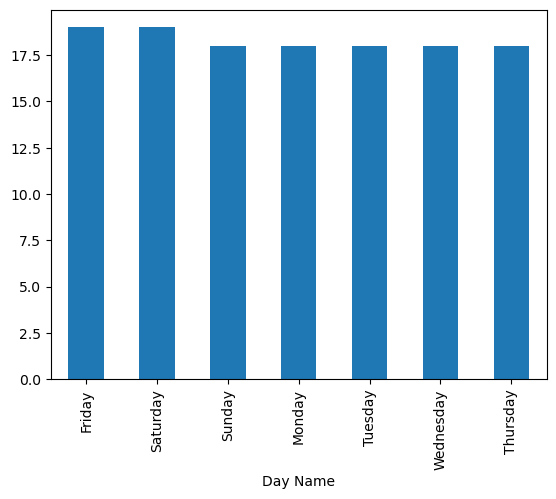

In [628]:
df['Day Name'].value_counts().plot(kind='bar');

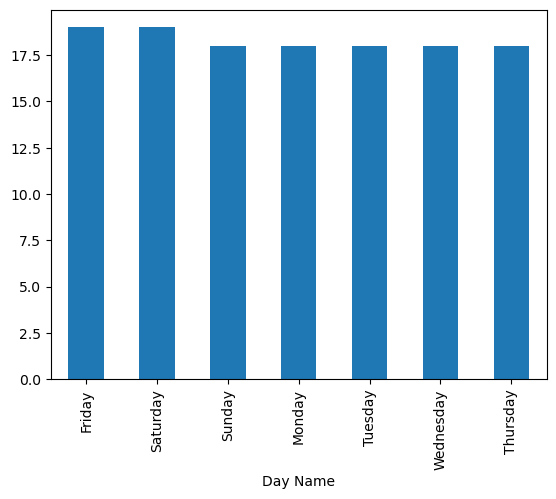

In [630]:
df['Day Name'].value_counts().plot.bar();

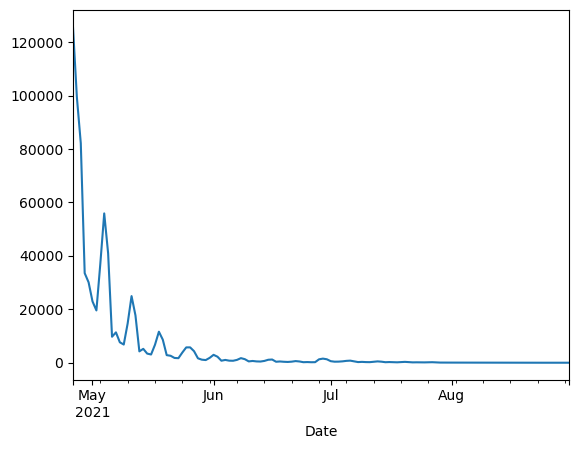

In [632]:
df['Daily BO'].plot();

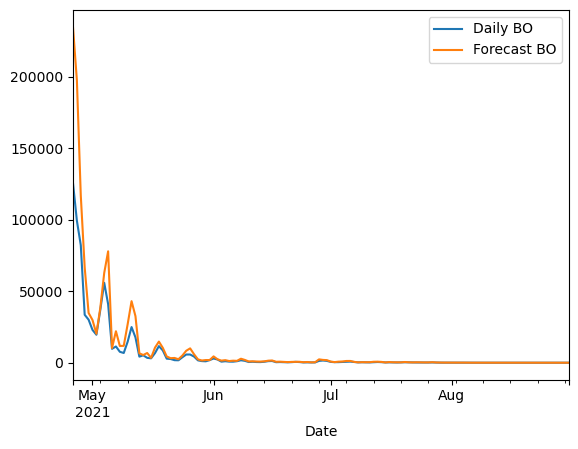

In [702]:
df[['Daily BO' ,'Forecast BO']].plot();

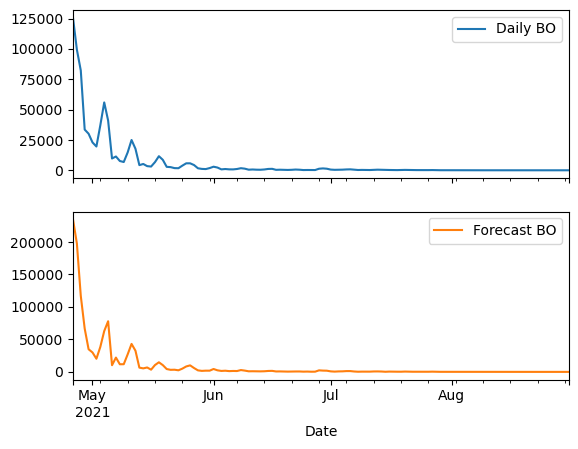

In [704]:
df[['Daily BO' ,'Forecast BO']].plot(subplots=True);

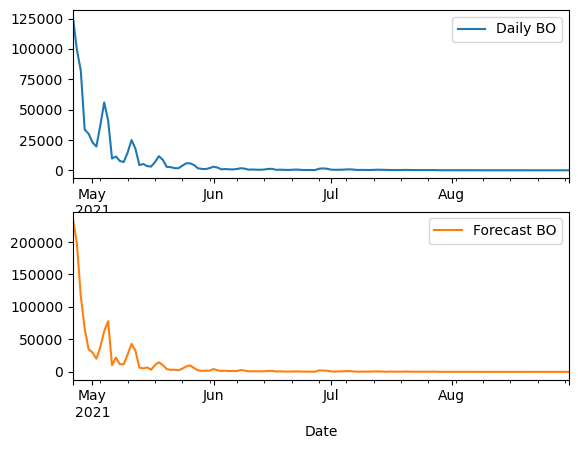

In [706]:
df[['Daily BO' ,'Forecast BO']].plot(subplots=True, sharex=False);

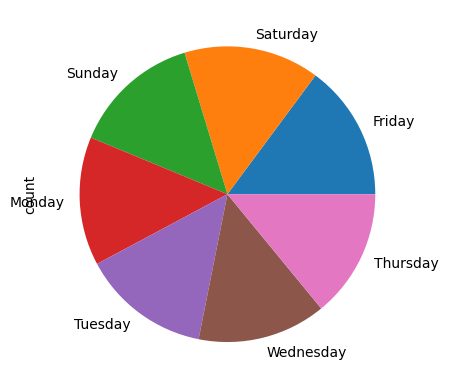

In [694]:
df['Day Name'].value_counts().plot(kind='pie');

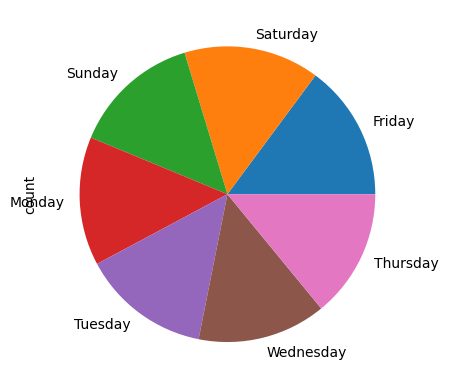

In [696]:
df['Day Name'].value_counts().plot.pie();

## Working with Excel files

In [981]:
#!pip install openpyxl
!conda install openpyxl -y

Retriedone
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
doneecting package metadata (repodata.json): - 
doneing environment: - 

## Package Plan ##

  environment location: /opt/anaconda3/envs/ch9

  added / updated specs:
    - openpyxl


The following NEW packages will be INSTALLED:

  et_xmlfile         conda-forge/noarch::et_xmlfile-2.0.0-pyhd8ed1ab_1 
  openpyxl           conda-forge/osx-arm64::openpyxl-3.1.5-py312hf6e0af7_1 




donearing transaction: \ 
done
doneuting transaction: \ 


In [983]:
import openpyxl
openpyxl.__version__

'3.1.5'

In [991]:
filepath = 'data/sales_trx_data.xlsx'

In [993]:
excelfile = pd.ExcelFile(filepath)
excelfile.sheet_names

['2017', '2018']

In [995]:
excelfile.parse('2017')

,Line_Item_ID,Date,Credit_Card_Number,Quantity,Menu_Item
0,1,2017-01-01,7437926611570790,1,spicy miso ramen
1,2,2017-01-01,7437926611570790,1,spicy miso ramen
2,3,2017-01-01,8421920068932810,3,tori paitan ramen
3,4,2017-01-01,8421920068932810,3,tori paitan ramen
4,5,2017-01-01,4787310681569640,1,truffle butter ramen
...,...,...,...,...,...
36759,36760,2017-12-31,3149176814183170,4,vegetarian curry + king trumpet mushroom ramen
36760,36761,2017-12-31,2005206728506200,1,tonkotsu ramen
36761,36762,2017-12-31,2005206728506200,1,tonkotsu ramen
36762,36763,2017-12-31,1130414909788170,2,soft-shell miso crab ramen


In [1005]:
df = pd.read_excel(filepath,
                    engine='openpyxl',
                    index_col=1,
                    parse_dates=True)
df.head()

,Line_Item_ID,Credit_Card_Number,Quantity,Menu_Item
Date,,,,
2017-01-01,1,7437926611570790,1,spicy miso ramen
2017-01-01,2,7437926611570790,1,spicy miso ramen
2017-01-01,3,8421920068932810,3,tori paitan ramen
2017-01-01,4,8421920068932810,3,tori paitan ramen
2017-01-01,5,4787310681569640,1,truffle butter ramen


In [997]:
df = pd.read_excel(filepath,
                    engine='openpyxl',
                    index_col=1,
                    sheet_name=[0,1],
                    parse_dates=True)
df.keys()

dict_keys([0, 1])

In [999]:
df = pd.read_excel(filepath,
                    engine='openpyxl',
                    index_col=1,
                    sheet_name=['2017','2018'],
                    parse_dates=True)
df.keys()

dict_keys(['2017', '2018'])

In [1007]:
df = pd.read_excel(filepath,
                    engine='openpyxl',
                    index_col=1,
                    sheet_name=None,
                    parse_dates=True)
df.keys()

dict_keys(['2017', '2018'])

In [1009]:
type(df)

dict

In [1013]:
df['2017']

,Line_Item_ID,Credit_Card_Number,Quantity,Menu_Item
Date,,,,
2017-01-01,1,7437926611570790,1,spicy miso ramen
2017-01-01,2,7437926611570790,1,spicy miso ramen
2017-01-01,3,8421920068932810,3,tori paitan ramen
2017-01-01,4,8421920068932810,3,tori paitan ramen
2017-01-01,5,4787310681569640,1,truffle butter ramen
...,...,...,...,...
2017-12-31,36760,3149176814183170,4,vegetarian curry + king trumpet mushroom ramen
2017-12-31,36761,2005206728506200,1,tonkotsu ramen
2017-12-31,36762,2005206728506200,1,tonkotsu ramen


In [1017]:
pd.concat(df)

Line_Item_ID  Credit_Card_Number  Quantity  \
     Date                                                     
2017 2017-01-01             1    7437926611570790         1   
     2017-01-01             2    7437926611570790         1   
     2017-01-01             3    8421920068932810         3   
     2017-01-01             4    8421920068932810         3   
     2017-01-01             5    4787310681569640         1   
...                       ...                 ...       ...   
2018 2018-12-31         74120    1697055332228940         4   
     2018-12-31         74121    6800009643487100         1   
     2018-12-31         74122    6800009643487100         1   
     2018-12-31         74123    5981057609583650         2   
     2018-12-31         74124    5981057609583650         2   

                             Menu_Item  
     Date                               
2017 2017-01-01       spicy miso ramen  
     2017-01-01       spicy miso ramen  
     2017-01-01      tori paitan ramen  
     2017-01-01      tori paitan ramen  
     2017-01-01   truffle butter ramen  
...                                ...  
2018 2018-12-31         tonkotsu ramen  
     2018-12-31  vegetarian spicy miso  
     2018-12-31  vegetarian spicy miso  
     2018-12-31       spicy miso ramen  
     2018-12-31       spicy miso ramen  

[74124 rows x 4 columns]

In [1019]:
pd.concat(df).droplevel(level=0)

,Line_Item_ID,Credit_Card_Number,Quantity,Menu_Item
Date,,,,
2017-01-01,1,7437926611570790,1,spicy miso ramen
2017-01-01,2,7437926611570790,1,spicy miso ramen
2017-01-01,3,8421920068932810,3,tori paitan ramen
2017-01-01,4,8421920068932810,3,tori paitan ramen
2017-01-01,5,4787310681569640,1,truffle butter ramen
...,...,...,...,...
2018-12-31,74120,1697055332228940,4,tonkotsu ramen
2018-12-31,74121,6800009643487100,1,vegetarian spicy miso
2018-12-31,74122,6800009643487100,1,vegetarian spicy miso


In [1021]:
df_comb = pd.concat(df).droplevel(level=0)

In [1029]:
df_comb

,Line_Item_ID,Credit_Card_Number,Quantity,Menu_Item
Date,,,,
2017-01-01,1,7437926611570790,1,spicy miso ramen
2017-01-01,2,7437926611570790,1,spicy miso ramen
2017-01-01,3,8421920068932810,3,tori paitan ramen
2017-01-01,4,8421920068932810,3,tori paitan ramen
2017-01-01,5,4787310681569640,1,truffle butter ramen
...,...,...,...,...
2018-12-31,74120,1697055332228940,4,tonkotsu ramen
2018-12-31,74121,6800009643487100,1,vegetarian spicy miso
2018-12-31,74122,6800009643487100,1,vegetarian spicy miso


## Read from GitHub

In [1031]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook-Second-Edition/refs/heads/main/datasets/Ch2/AirQualityUCI.csv'

df = pd.read_csv(url,
                 delimiter=';',
                 parse_dates=['Date'],
                 index_col='Date')

df

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
10/03/2004,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
10/03/2004,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
10/03/2004,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
10/03/2004,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
10/03/2004,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
04/04/2005,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
04/04/2005,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
04/04/2005,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649


## Read from AWS S3

In [1033]:
url = 'https://tscookbook.s3.amazonaws.com/AirQualityUCI.xlsx'

df = pd.read_excel(url,
                   index_col='Date',
                   parse_dates=True)
df.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [1035]:
url = 'https://s3.us-east-1.amazonaws.com/tscookbook/AirQualityUCI.xlsx'

df = pd.read_excel(url,
                   index_col='Date',
                   parse_dates=True)
df.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [1047]:
#! pip install fsspec
#! pip install s3fs

In [1049]:
url = 's3://tscookbook/AirQualityUCI.xlsx'
df = pd.read_excel(url,
                   index_col='Date',
                   parse_dates=True)
df.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


### Private S3

In [1089]:
import getpass

In [1099]:
AWS_KEY = getpass.getpass("Enter AWS Key")

Enter AWS Key ········


In [1101]:
AWS_SECRET = getpass.getpass("Enter AWS Secret")

Enter AWS Secret ········


In [1105]:
# # This will produce PermissionError: Forbidden
# s3uri = "s3://tscookbook-private/AirQuality.csv"

# df = pd.read_csv(s3uri,
#                  index_col='Date',
#                  parse_dates=True)

Several of the pandas read and write functions allow you to pass your authentication credentials via the `storage_options` parameter

In [1108]:
s3uri = "s3://tscookbook-private/AirQuality.csv"

df = pd.read_csv(s3uri,
                 index_col='Date',
                 parse_dates=True,
                 storage_options= {
                         'key': AWS_KEY,
                         'secret': AWS_SECRET
                     })

In [1110]:
df.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
Date,,,,,,,,,,,,,,,,
2004-10-03,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
2004-10-03,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2004-10-03,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
2004-10-03,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
2004-10-03,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [1055]:
#!pip install lxml

## Read HTML

In [1057]:
url = "https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory"
results = pd.read_html(url)

print(len(results))

68


In [1059]:
type(results)

list

In [1061]:
df = results[15]
df.columns

Index(['Region[30]', 'Total cases', 'Total deaths', 'Cases per million',
       'Deaths per million', 'Current weekly cases', 'Current weekly deaths',
       'Population millions', 'Vacci­nated %[31]'],
      dtype='object')

In [1065]:
cols = ['Region[30]','Total cases', 'Total deaths', 'Cases per million']
df[cols]

,Region[30],Total cases,Total deaths,Cases per million
0,European Union,179537758,1185108,401363
1,North America,103783777,1133607,281404
2,Other Europe,57721948,498259,247054
3,South America,65835789,1313061,153151
4,Russia and Central Asia,25646533,434988,108307
5,Central America,11338600,380660,63108
6,Middle East,22549784,238106,86400
7,Oceania and islands in East Asia,60806544,318455,105317
8,Caribbean,2605473,26237,60179
9,South Asia,50347136,620218,27121


## Read from SQL
* `read_sql`
* `read_sql_table`
* `read_sql_query`

For additional databases checkout:
* Reading: https://github.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook-Second-Edition/blob/main/code/Ch3/Chapter%203.ipynb
* Writing:  https://github.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook-Second-Edition/blob/main/code/Ch5/Chapter%205.ipynb

### SQLite

In [1225]:
import sqlite3

In [1227]:
con = sqlite3.connect("data/crime_database.db")

In [1229]:
query = """
SELECT i.name,
i.income,
d.gender,
d.plate
FROM drivers as d
JOIN individual as i
 on d.id = i.driver_id;
"""

In [1231]:
cur = con.cursor()
res = cur.execute(query).fetchall()
res[0:10]

[('Herve Lilie', 63163.25, 'Male', 'HBD-53'),
 ('Jacqueline Colam', 94851.22, 'Female', 'QGA-23'),
 ('Keenan Treker', 58070.55, 'Male', 'QKT-03'),
 ('Kimbell Everill', 40770.06, 'Male', 'EJZ-03'),
 ('Abramo De Bernardis', 89059.97, 'Male', 'OKE-23'),
 ('Iggy Duferie', 82433.22, 'Male', 'FRM-53'),
 ('Helli Bartoleyn', 43438.83, 'Female', 'MXN-03'),
 ('Lacy Havik', 70112.23, 'Female', 'RHC-83'),
 ('Winn Weldon', 43550.86, 'Male', 'ZPL-23'),
 ('Marlena Heggison', 46694.42, 'Female', 'DNV-13')]

In [1233]:
df = pd.read_sql(query, con)
df.head()

,name,income,gender,plate
0,Herve Lilie,63163.25,Male,HBD-53
1,Jacqueline Colam,94851.22,Female,QGA-23
2,Keenan Treker,58070.55,Male,QKT-03
3,Kimbell Everill,40770.06,Male,EJZ-03
4,Abramo De Bernardis,89059.97,Male,OKE-23


In [1235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    1000 non-null   object 
 1   income  1000 non-null   float64
 2   gender  1000 non-null   object 
 3   plate   1000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [1237]:
pd.read_sql_query(query, con)

,name,income,gender,plate
0,Herve Lilie,63163.25,Male,HBD-53
1,Jacqueline Colam,94851.22,Female,QGA-23
2,Keenan Treker,58070.55,Male,QKT-03
3,Kimbell Everill,40770.06,Male,EJZ-03
4,Abramo De Bernardis,89059.97,Male,OKE-23
...,...,...,...,...
995,Peyton Pennells,91672.51,Female,PLG-83
996,Nydia Lillgard,42514.00,Female,RID-63
997,Quinlan Pretley,86607.10,Female,BMQ-93
998,Eolande Casebourne,71801.07,Female,LAG-63


### DuckDB

In [1168]:
#!pip install duckdb

In [1188]:
# using Duckdb to read from GitHub
import duckdb
data_url = "https://raw.githubusercontent.com/tatwan/data_academy_community/refs/heads/main/Capstone/Datasets/Education/MonthlStackOverflowQuestions.csv"

query = f"SELECT month, Python from '{data_url}'"
results = duckdb.sql(query).df()

In [1190]:
results

,Month,Python
0,2008-09-01,537
1,2008-11-01,448
2,2008-12-01,437
3,2009-01-01,631
4,2009-02-01,630
...,...,...
180,2023-10-01,9031
181,2023-11-01,8482
182,2023-12-01,7028
183,2024-01-01,8024


In [1194]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   185 non-null    datetime64[us]
 1   Python  185 non-null    int64         
dtypes: datetime64[us](1), int64(1)
memory usage: 3.0 KB


In [1201]:
# Remember this DataFrame from earlier
df

,name,income,gender,plate
0,Herve Lilie,63163.25,Male,HBD-53
1,Jacqueline Colam,94851.22,Female,QGA-23
2,Keenan Treker,58070.55,Male,QKT-03
3,Kimbell Everill,40770.06,Male,EJZ-03
4,Abramo De Bernardis,89059.97,Male,OKE-23
...,...,...,...,...
995,Peyton Pennells,91672.51,Female,PLG-83
996,Nydia Lillgard,42514.00,Female,RID-63
997,Quinlan Pretley,86607.10,Female,BMQ-93
998,Eolande Casebourne,71801.07,Female,LAG-63


duckdb allows you to write SQL against a DataFrame directly 

In [1209]:
duckdb.sql("""
SELECT gender, 
avg(income) as avg_income
from df 
group by gender;
""")

┌─────────┬────────────────────┐
│ gender  │     avg_income     │
│ varchar │       double       │
├─────────┼────────────────────┤
│ Female  │ 64647.153266533096 │
│ Male    │ 64120.596606786356 │
└─────────┴────────────────────┘

In [1211]:
duckdb.sql("""
SELECT gender, 
avg(income) as avg_income
from df 
where income > 50000
group by gender 
""")

┌─────────┬───────────────────┐
│ gender  │    avg_income     │
│ varchar │      double       │
├─────────┼───────────────────┤
│ Male    │ 75535.16923753654 │
│ Female  │ 74422.01661064426 │
└─────────┴───────────────────┘

## Read Parquet

In [1263]:
#!pip install pyarrow
#!conda install pyarrow -y

In [1267]:
df = pd.read_parquet('data/yellow_tripdata_2023-01.parquet')

In [1269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [1271]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [1283]:
(df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])

0         0 days 00:08:26
1         0 days 00:06:19
2         0 days 00:12:45
3         0 days 00:09:37
4         0 days 00:10:50
                ...      
3066761   0 days 00:13:59
3066762   0 days 00:19:27
3066763   0 days 00:24:31
3066764   0 days 00:13:00
3066765   0 days 00:14:24
Length: 3066766, dtype: timedelta64[us]

In [1285]:
df['time_between'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [1293]:
df['month'] = df['tpep_dropoff_datetime'].dt.month
df['year'] = df['tpep_dropoff_datetime'].dt.year

In [1297]:
df['year'].value_counts()

year
2023    3066741
2022         23
2009          2
Name: count, dtype: int64

In [1336]:
df['month'].value_counts()

month
1     3066126
2         617
12         12
10         11
Name: count, dtype: int64

Boolean condition

In [1343]:
mask = df['year'] == 2022

In [1345]:
df[mask]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,time_between,month,year
80,2,2022-12-31 23:51:30,2022-12-31 23:56:06,1.0,0.86,1.0,N,141,140,1,...,0.5,2.00,0.0,1.0,13.50,2.5,0.00,0 days 00:04:36,12,2022
900,2,2022-12-31 23:44:31,2022-12-31 23:48:47,1.0,0.52,1.0,N,233,162,1,...,0.5,2.16,0.0,1.0,12.96,2.5,0.00,0 days 00:04:16,12,2022
2172,2,2022-12-31 14:24:54,2022-12-31 14:35:25,1.0,0.41,1.0,N,48,163,2,...,0.5,0.00,0.0,1.0,15.00,2.5,0.00,0 days 00:10:31,12,2022
2173,2,2022-12-31 14:39:43,2022-12-31 14:43:37,1.0,0.54,1.0,N,163,162,1,...,0.5,2.16,0.0,1.0,12.96,2.5,0.00,0 days 00:03:54,12,2022
2931,2,2022-12-31 22:02:51,2022-12-31 22:28:31,1.0,7.78,1.0,N,79,238,1,...,0.5,8.18,0.0,1.0,49.08,2.5,0.00,0 days 00:25:40,12,2022
2932,2,2022-12-31 22:34:05,2022-12-31 22:40:07,1.0,0.91,1.0,N,239,142,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,0 days 00:06:02,12,2022
4474,2,2022-12-31 23:53:04,2022-12-31 23:59:22,1.0,1.15,1.0,N,148,79,1,...,0.5,2.72,0.0,1.0,16.32,2.5,0.00,0 days 00:06:18,12,2022
7276,2,2022-12-31 15:14:12,2022-12-31 15:25:34,1.0,1.54,1.0,N,193,7,2,...,0.5,0.00,0.0,1.0,13.20,0.0,0.00,0 days 00:11:22,12,2022
8046,2,2022-12-31 22:42:29,2022-12-31 22:56:37,1.0,2.17,1.0,N,142,263,1,...,0.5,4.12,0.0,1.0,24.72,2.5,0.00,0 days 00:14:08,12,2022
8047,2,2022-12-31 23:07:51,2022-12-31 23:19:58,1.0,2.90,1.0,N,263,41,1,...,0.5,3.00,0.0,1.0,23.60,2.5,0.00,0 days 00:12:07,12,2022


In [1349]:
df[mask].to_parquet('data/output', partition_cols=['month', 'VendorID'])

In [1365]:
filters = [('month', '==', 10)]


pd.read_parquet('data/output', filters=filters)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,time_between,year,month,VendorID
10023,2022-10-24 17:37:47,2022-10-24 17:37:51,1.0,0.00,5.0,N,1,1,2,120.0,...,0.00,0.0,0.3,120.30,0.0,0.00,0 days 00:00:04,2022,10,2
18219,2022-10-24 20:01:46,2022-10-24 20:01:48,1.0,0.00,5.0,N,17,17,1,45.0,...,9.06,0.0,0.3,54.36,0.0,0.00,0 days 00:00:02,2022,10,2
21660,2022-10-24 21:45:35,2022-10-24 21:45:38,1.0,0.00,5.0,N,48,264,1,75.0,...,15.06,0.0,0.3,90.36,0.0,0.00,0 days 00:00:03,2022,10,2
22489,2022-10-24 23:15:32,2022-10-24 23:15:42,1.0,0.00,5.0,N,211,211,1,55.0,...,14.45,0.0,0.3,72.25,2.5,0.00,0 days 00:00:10,2022,10,2
24577,2022-10-25 00:42:10,2022-10-25 00:44:22,1.0,0.97,1.0,N,132,132,2,4.5,...,0.00,0.0,0.3,6.55,0.0,1.25,0 days 00:02:12,2022,10,2
24578,2022-10-25 00:59:02,2022-10-25 01:09:02,1.0,2.33,1.0,N,265,265,2,10.0,...,0.00,0.0,0.3,10.80,0.0,0.00,0 days 00:10:00,2022,10,2
31916,2022-10-25 03:45:46,2022-10-25 03:45:50,1.0,0.02,5.0,N,1,1,1,115.0,...,5.00,0.0,0.3,120.30,0.0,0.00,0 days 00:00:04,2022,10,2
47843,2022-10-25 07:48:15,2022-10-25 07:48:18,2.0,0.76,5.0,N,132,264,1,78.0,...,15.76,0.0,0.3,94.56,0.0,0.00,0 days 00:00:03,2022,10,2
51998,2022-10-25 09:06:23,2022-10-25 09:21:36,1.0,6.48,1.0,N,132,38,2,19.5,...,0.00,0.0,0.3,21.55,0.0,1.25,0 days 00:15:13,2022,10,2
59669,2022-10-25 11:17:19,2022-10-25 11:17:21,1.0,0.00,5.0,N,264,264,1,75.0,...,15.16,0.0,0.3,90.96,0.0,0.00,0 days 00:00:02,2022,10,2


In [1367]:
filters = [('month', '>=', 10)]
columns = ['tpep_pickup_datetime', 'passenger_count', 'trip_distance']

pd.read_parquet('data/output', filters=filters,  columns=columns)

,tpep_pickup_datetime,passenger_count,trip_distance
10023,2022-10-24 17:37:47,1.0,0.00
18219,2022-10-24 20:01:46,1.0,0.00
21660,2022-10-24 21:45:35,1.0,0.00
22489,2022-10-24 23:15:32,1.0,0.00
24577,2022-10-25 00:42:10,1.0,0.97
24578,2022-10-25 00:59:02,1.0,2.33
31916,2022-10-25 03:45:46,1.0,0.02
47843,2022-10-25 07:48:15,2.0,0.76
51998,2022-10-25 09:06:23,1.0,6.48
59669,2022-10-25 11:17:19,1.0,0.00


## Handling Missing Data

In [1370]:
co2_file = Path('data/missing/co2_missing.csv')
ecom_file = Path('data/missing/clicks_missing_multiple.csv')

In [1403]:
co2 = pd.read_csv(co2_file,  
                      parse_dates=['year'])
ecom = pd.read_csv(ecom_file, 
                       parse_dates=['date'])

In [1405]:
co2

,year,co2
0,1750-01-01,0.0125
1,1760-01-01,0.0128
2,1770-01-01,0.0150
3,1780-01-01,0.0169
4,1790-01-01,0.0206
...,...,...
221,2016-01-01,4.7496
222,2017-01-01,4.7595
223,2018-01-01,4.8022
224,2019-01-01,4.7582


**Different ways missing data is represented**
* `NaN` - Not a Number
* `NaT` - Not a Time
* `None`

In [1439]:
# missing integers
pd.Series([1, 2, 3, None])

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64

In [1441]:
# missing strings
pd.Series(["Mike", "Smith", None])

0     Mike
1    Smith
2     None
dtype: object

In [1443]:
# missing date/time
pd.Series([pd.Timestamp('2025-01-01'), pd.Timestamp('2025-01-02'), None])

0   2025-01-01
1   2025-01-02
2          NaT
dtype: datetime64[ns]

In [1407]:
ecom

,date,price,location,clicks
0,2008-04-01,43.155647,2.0,18784
1,2008-04-02,43.079056,1.0,24738
2,NaT,43.842609,NaN,15209
3,NaT,NaN,1.0,14018
4,NaT,43.941176,1.0,11974
...,...,...,...,...
130,2008-08-09,44.182033,1.0,6716
131,2008-08-10,43.608260,1.0,9523
132,2008-08-11,43.553363,1.0,8881
133,2008-08-12,44.500469,1.0,7272


In [1411]:
co2.notna().sum()

year    226
co2     201
dtype: int64

In [1378]:
co2.isna().sum()

year     0
co2     25
dtype: int64

In [1384]:
ecom = pd.read_csv(ecom_file)

In [1386]:
ecom.isna().sum()

date         4
price        1
location     1
clicks      14
dtype: int64

In [1388]:
ecom.isna().sum().sum()

np.int64(20)

In [1390]:
ecom

,date,price,location,clicks
0,4/1/2008,43.155647,2.0,18784
1,4/2/2008,43.079056,1.0,24738
2,NaN,43.842609,NaN,15209
3,NaN,NaN,1.0,14018
4,NaN,43.941176,1.0,11974
...,...,...,...,...
130,8/9/2008,44.182033,1.0,6716
131,8/10/2008,43.608260,1.0,9523
132,8/11/2008,43.553363,1.0,8881
133,8/12/2008,44.500469,1.0,7272


In [1395]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      131 non-null    object 
 1   price     134 non-null    float64
 2   location  134 non-null    float64
 3   clicks    121 non-null    object 
dtypes: float64(2), object(2)
memory usage: 4.3+ KB


In [1445]:
co2.replace(0, np.nan, inplace=True)
co2.isnull().sum()

year     0
co2     35
dtype: int64

In [1447]:
ecom.replace('?', np.nan, inplace=True)
ecom.isnull().sum()

date         4
price        1
location     1
clicks      16
dtype: int64

In [1449]:
ecom.isnull().sum().sum()

np.int64(22)

In [1703]:
co2 = pd.read_csv(co2_file,  
                      parse_dates=['year'],
                      index_col=['year'],
                      na_values={0})
ecom = pd.read_csv(ecom_file, 
                       parse_dates=['date'],
                      na_values={'?'})

In [1584]:
print(co2.isnull().sum().sum())
print(ecom.isnull().sum().sum())

35
22


In [1586]:
co2_avg = co2['co2'].mean()
co2_fill = co2['co2'].fillna(co2_avg)
co2_fill.isna().sum()

np.int64(0)

<Axes: title={'center': 'Co2 with missing data'}, xlabel='year'>

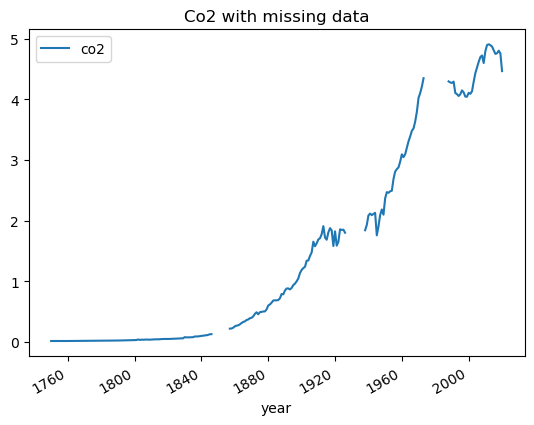

In [1588]:
co2.plot(title='Co2 with missing data')

<Axes: title={'center': 'Co2 impute with average'}, xlabel='year'>

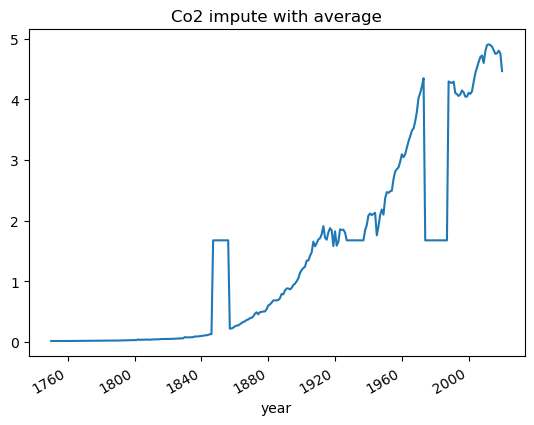

In [1590]:
co2_fill.plot(title='Co2 impute with average')

In [1592]:
co2_fill = co2['co2'].ffill()
co2_fill.isna().sum()

np.int64(0)

<Axes: title={'center': 'Co2 impute Forward Fill'}, xlabel='year'>

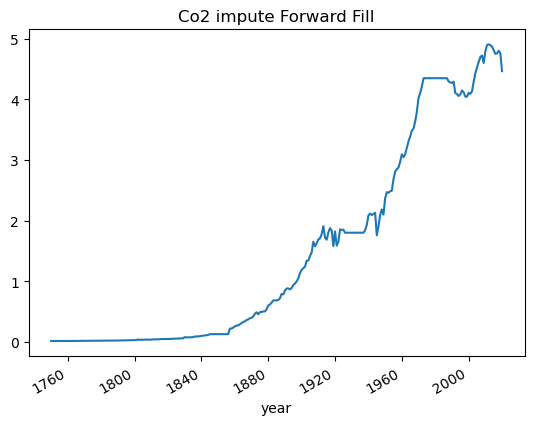

In [1594]:
co2_fill.plot(title='Co2 impute Forward Fill')

In [1596]:
co2_fill = co2['co2'].bfill()
co2_fill.isna().sum()

np.int64(0)

<Axes: title={'center': 'Co2 impute Backward Fill'}, xlabel='year'>

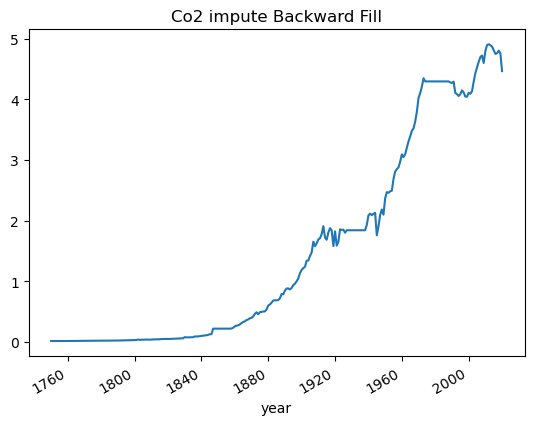

In [1598]:
co2_fill.plot(title='Co2 impute Backward Fill')

In [1600]:
values = {'clicks': ecom['clicks'].median(), 
         'price': ecom['price'].mean(),
         'location': ecom['location'].mode()[0]}

In [1602]:
ecom_fill = ecom.fillna(value=values)
ecom_fill.isna().sum()

date        4
price       0
location    0
clicks      0
dtype: int64

In [1604]:
ecom_fill['date']

0     2008-04-01
1     2008-04-02
2            NaT
3            NaT
4            NaT
         ...    
130   2008-08-09
131   2008-08-10
132   2008-08-11
133   2008-08-12
134   2008-08-13
Name: date, Length: 135, dtype: datetime64[ns]

In [1606]:
pd.date_range(start='2008-04-01', end='2008-08-13', periods=135)

DatetimeIndex(['2008-04-01', '2008-04-02', '2008-04-03', '2008-04-04',
               '2008-04-05', '2008-04-06', '2008-04-07', '2008-04-08',
               '2008-04-09', '2008-04-10',
               ...
               '2008-08-04', '2008-08-05', '2008-08-06', '2008-08-07',
               '2008-08-08', '2008-08-09', '2008-08-10', '2008-08-11',
               '2008-08-12', '2008-08-13'],
              dtype='datetime64[ns]', length=135, freq=None)

In [1608]:
ecom_fill['date'] = pd.date_range(start='2008-04-01', end='2008-08-13', periods=135)
ecom_fill.isna().sum()

date        0
price       0
location    0
clicks      0
dtype: int64

In [1707]:
ecom_df = ecom_fill.set_index('date')
ecom = ecom.set_index('date')

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

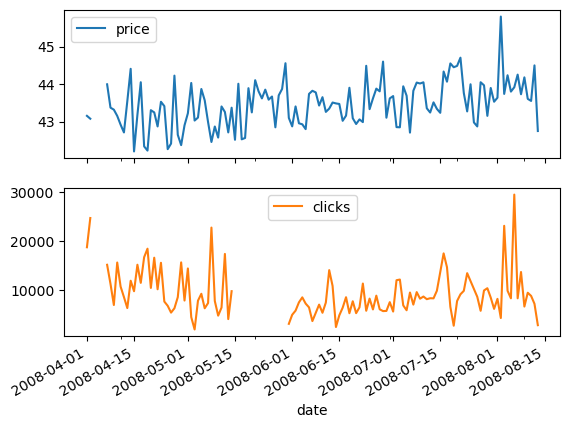

In [1626]:
ecom[['price', 'clicks']].plot(subplots=True)

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

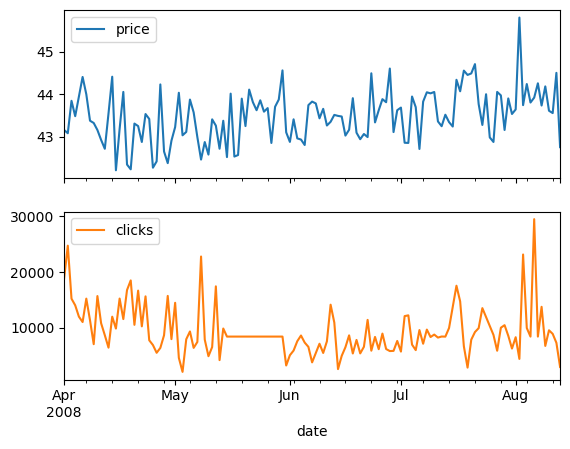

In [1620]:
ecom_df[['price', 'clicks']].plot(subplots=True)

### Interpolation
In Pandas, interpolation is a technique used to fill missing values (NaN) in a DataFrame or Series by estimating them based on existing data. The interpolate() method provides various methods to approximate these missing values, making it a powerful tool for handling incomplete datasets during data preprocessing.

<Axes: title={'center': 'Co2 with missing values'}, xlabel='year'>

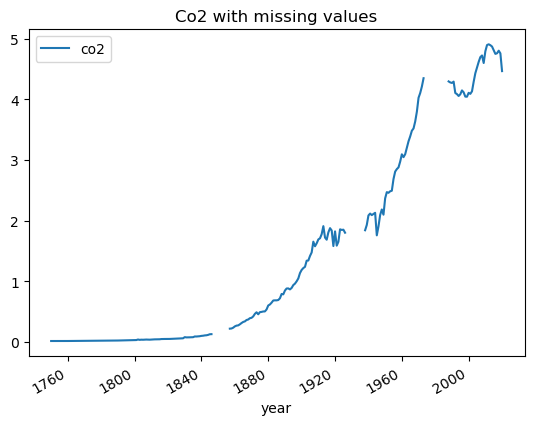

In [1678]:
co2.plot(title='Co2 with missing values')

<Axes: xlabel='year'>

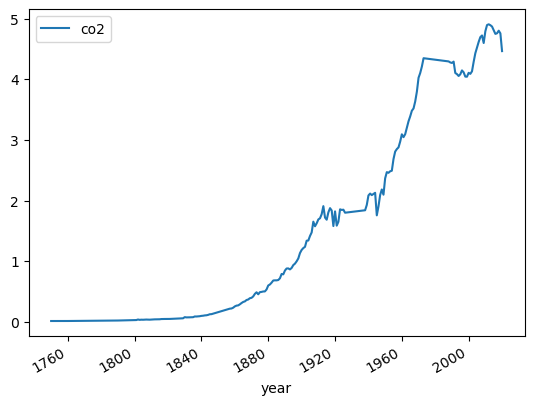

In [1632]:
co2.interpolate(method='linear').plot(title='Co2 linear interpolation')

<Axes: title={'center': 'Co2 nearest interpolation'}, xlabel='year'>

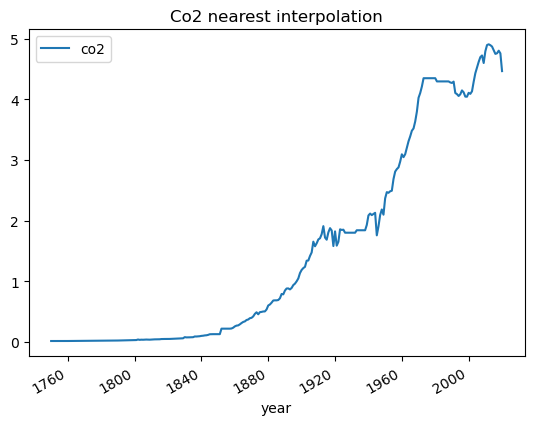

In [1670]:
co2.interpolate(method='nearest').plot(title='Co2 nearest interpolation')

<Axes: title={'center': 'Co2 quadratic interpolation'}, xlabel='year'>

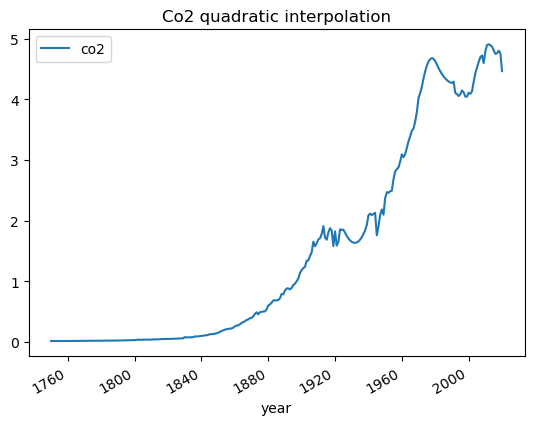

In [1672]:
co2.interpolate(method='quadratic').plot(title='Co2 quadratic interpolation')

<Axes: title={'center': 'Co2 spline interpolation'}, xlabel='year'>

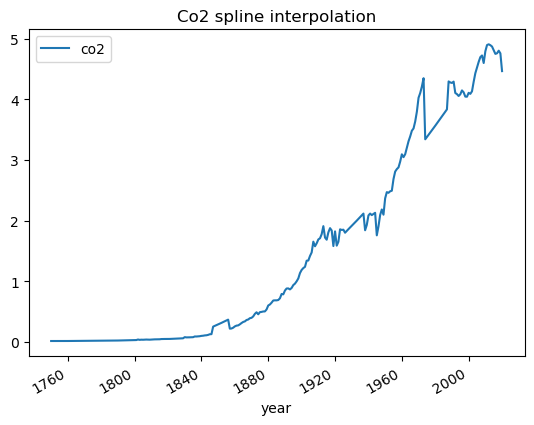

In [1674]:
co2.interpolate(method='spline', order=2).plot(title='Co2 spline interpolation')

<Axes: title={'center': 'Clicks with missing values'}>

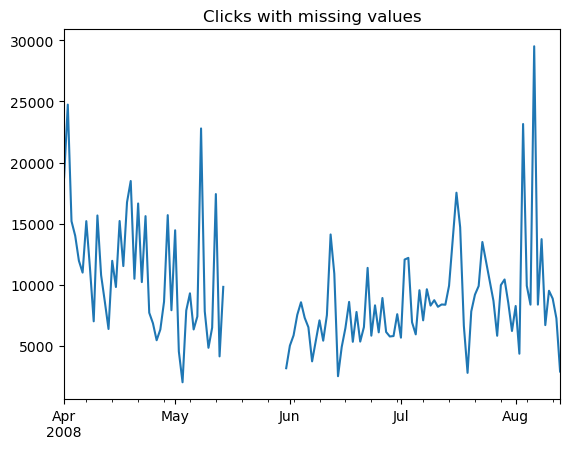

In [1713]:
ecom.index = pd.date_range(start='2008-04-01', end='2008-08-13', periods=135)
ecom['clicks'].plot(title='Clicks with missing values')

<Axes: title={'center': 'Clicks linear interpolation'}>

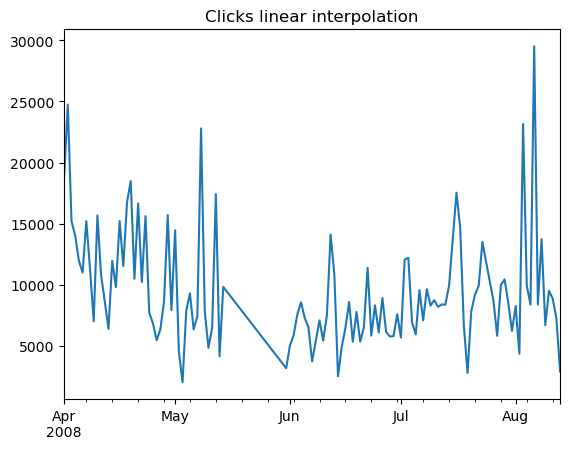

In [1715]:
ecom['clicks'].interpolate(method='linear').plot(title='Clicks linear interpolation')

<Axes: title={'center': 'Clicks nearest interpolation'}>

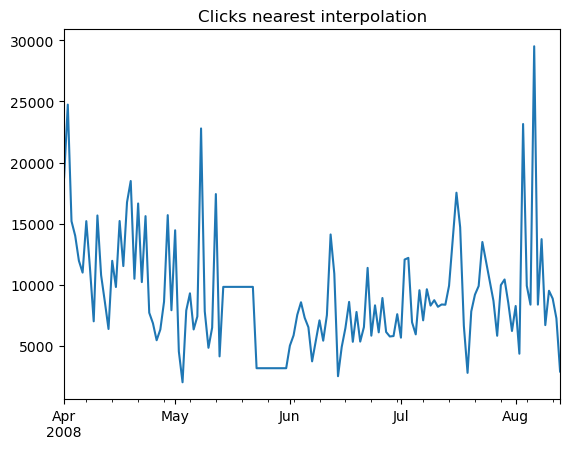

In [1717]:
ecom['clicks'].interpolate(method='nearest').plot(title='Clicks nearest interpolation')

<Axes: title={'center': 'Clicks spline interpolation'}>

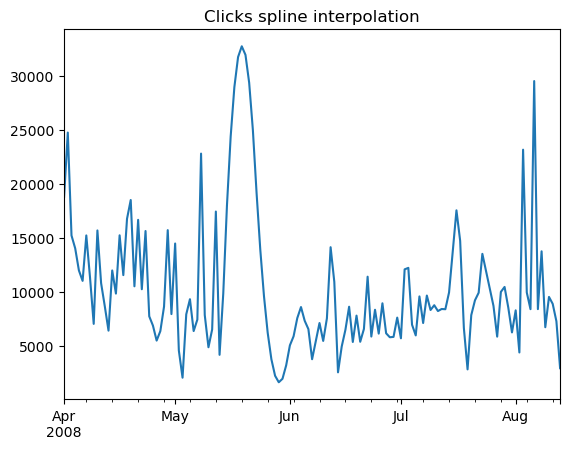

In [1719]:
ecom['clicks'].interpolate(method='spline', order=2).plot(title='Clicks spline interpolation')

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

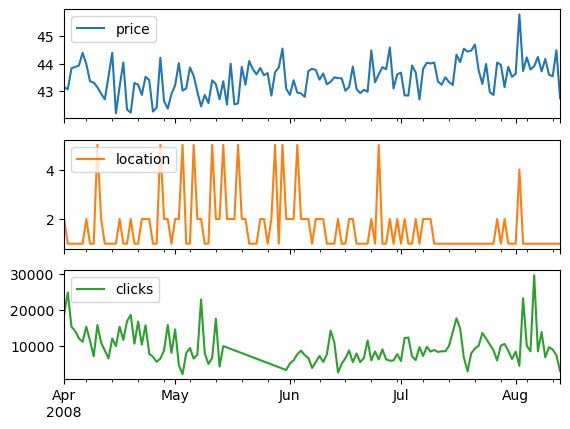

In [1725]:
ecom.interpolate(method='time').plot(subplots=True)